In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp1d

import keras

from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
x_train = x_train/127.5-1

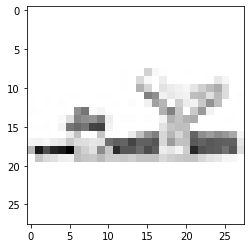

In [4]:
plt.imshow(x_train[-1], cmap='Greys')

In [5]:
x_train = np.expand_dims(x_train, axis=3)

In [6]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)             

In [7]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [8]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [9]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

0 [D loss: 0.635197, acc.: 62.50%] [G loss: 1.138744]


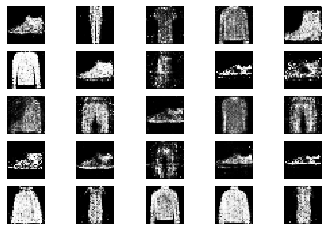

1 [D loss: 0.625931, acc.: 65.00%] [G loss: 1.194651]
2 [D loss: 0.547197, acc.: 70.00%] [G loss: 1.144077]
3 [D loss: 0.559046, acc.: 75.00%] [G loss: 1.097641]
4 [D loss: 0.808236, acc.: 47.50%] [G loss: 1.076891]
5 [D loss: 0.712717, acc.: 52.50%] [G loss: 0.974290]
6 [D loss: 0.551591, acc.: 75.00%] [G loss: 1.059497]
7 [D loss: 0.793731, acc.: 50.00%] [G loss: 1.078344]
8 [D loss: 0.624074, acc.: 57.50%] [G loss: 1.049000]
9 [D loss: 0.707714, acc.: 62.50%] [G loss: 1.408731]
10 [D loss: 0.605278, acc.: 67.50%] [G loss: 1.072820]
11 [D loss: 0.623098, acc.: 65.00%] [G loss: 0.957024]
12 [D loss: 0.577377, acc.: 67.50%] [G loss: 0.998750]
13 [D loss: 0.636311, acc.: 60.00%] [G loss: 1.149893]
14 [D loss: 0.481061, acc.: 75.00%] [G loss: 1.291031]
15 [D loss: 0.611501, acc.: 60.00%] [G loss: 1.086583]
16 [D loss: 0.554454, acc.: 65.00%] [G loss: 1.067558]
17 [D loss: 0.606341, acc.: 67.50%] [G loss: 1.120440]
18 [D loss: 0.666830, acc.: 60.00%] [G loss: 1.193194]
19 [D loss: 0.63491

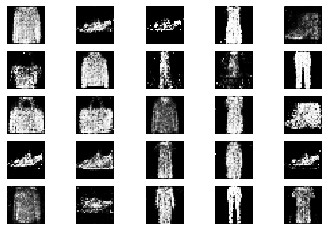

51 [D loss: 0.554854, acc.: 75.00%] [G loss: 1.340850]
52 [D loss: 0.568962, acc.: 67.50%] [G loss: 1.375104]
53 [D loss: 0.528325, acc.: 70.00%] [G loss: 1.316125]
54 [D loss: 0.697067, acc.: 60.00%] [G loss: 1.315672]
55 [D loss: 0.600610, acc.: 62.50%] [G loss: 1.332446]
56 [D loss: 0.662512, acc.: 65.00%] [G loss: 1.321432]
57 [D loss: 0.489290, acc.: 80.00%] [G loss: 1.308648]
58 [D loss: 0.743034, acc.: 60.00%] [G loss: 0.913346]
59 [D loss: 0.568836, acc.: 65.00%] [G loss: 1.192552]
60 [D loss: 0.562450, acc.: 72.50%] [G loss: 1.248663]
61 [D loss: 0.540905, acc.: 80.00%] [G loss: 1.185762]
62 [D loss: 0.587086, acc.: 72.50%] [G loss: 1.235734]
63 [D loss: 0.572860, acc.: 70.00%] [G loss: 1.115846]
64 [D loss: 0.634137, acc.: 65.00%] [G loss: 1.066464]
65 [D loss: 0.546368, acc.: 72.50%] [G loss: 1.438780]
66 [D loss: 0.546026, acc.: 67.50%] [G loss: 1.496609]
67 [D loss: 0.684350, acc.: 65.00%] [G loss: 1.413343]
68 [D loss: 0.543140, acc.: 72.50%] [G loss: 1.343755]
69 [D loss

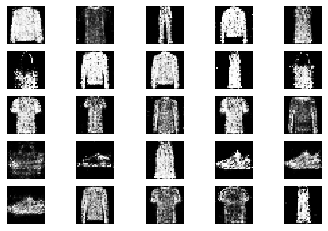

101 [D loss: 0.684888, acc.: 57.50%] [G loss: 1.260362]
102 [D loss: 0.564917, acc.: 75.00%] [G loss: 1.149471]
103 [D loss: 0.521240, acc.: 72.50%] [G loss: 0.921180]
104 [D loss: 0.588516, acc.: 70.00%] [G loss: 1.002053]
105 [D loss: 0.589447, acc.: 65.00%] [G loss: 1.096657]
106 [D loss: 0.559809, acc.: 67.50%] [G loss: 1.175434]
107 [D loss: 0.459821, acc.: 80.00%] [G loss: 1.128078]
108 [D loss: 0.594145, acc.: 77.50%] [G loss: 1.491001]
109 [D loss: 0.478304, acc.: 77.50%] [G loss: 1.307348]
110 [D loss: 0.520706, acc.: 77.50%] [G loss: 1.302045]
111 [D loss: 0.584176, acc.: 72.50%] [G loss: 1.210865]
112 [D loss: 0.627620, acc.: 70.00%] [G loss: 1.097666]
113 [D loss: 0.581845, acc.: 67.50%] [G loss: 1.118093]
114 [D loss: 0.673942, acc.: 62.50%] [G loss: 1.223587]
115 [D loss: 0.687475, acc.: 55.00%] [G loss: 1.253067]
116 [D loss: 0.837861, acc.: 37.50%] [G loss: 1.101820]
117 [D loss: 0.685149, acc.: 60.00%] [G loss: 1.205721]
118 [D loss: 0.597682, acc.: 65.00%] [G loss: 1.

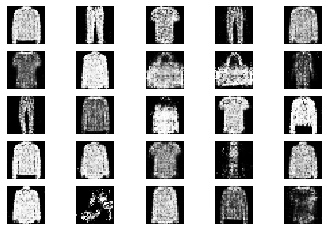

151 [D loss: 0.533747, acc.: 72.50%] [G loss: 1.285361]
152 [D loss: 0.471080, acc.: 82.50%] [G loss: 1.244378]
153 [D loss: 0.490855, acc.: 85.00%] [G loss: 1.402605]
154 [D loss: 0.642385, acc.: 65.00%] [G loss: 1.229128]
155 [D loss: 0.594408, acc.: 65.00%] [G loss: 1.245805]
156 [D loss: 0.647736, acc.: 57.50%] [G loss: 1.246051]
157 [D loss: 0.520618, acc.: 75.00%] [G loss: 1.217254]
158 [D loss: 0.658702, acc.: 60.00%] [G loss: 1.237804]
159 [D loss: 0.554555, acc.: 67.50%] [G loss: 1.115779]
160 [D loss: 0.665236, acc.: 62.50%] [G loss: 1.148355]
161 [D loss: 0.625974, acc.: 65.00%] [G loss: 1.145348]
162 [D loss: 0.572256, acc.: 62.50%] [G loss: 0.971077]
163 [D loss: 0.428278, acc.: 85.00%] [G loss: 1.197481]
164 [D loss: 0.621279, acc.: 70.00%] [G loss: 0.983370]
165 [D loss: 0.519275, acc.: 70.00%] [G loss: 1.359606]
166 [D loss: 0.397895, acc.: 82.50%] [G loss: 1.346818]
167 [D loss: 0.626158, acc.: 62.50%] [G loss: 1.319133]
168 [D loss: 0.604613, acc.: 62.50%] [G loss: 1.

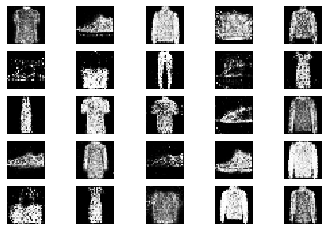

201 [D loss: 0.498006, acc.: 72.50%] [G loss: 1.242736]
202 [D loss: 0.567773, acc.: 75.00%] [G loss: 1.222221]
203 [D loss: 0.548118, acc.: 65.00%] [G loss: 1.268336]
204 [D loss: 0.644161, acc.: 65.00%] [G loss: 1.319479]
205 [D loss: 0.569747, acc.: 72.50%] [G loss: 1.220366]
206 [D loss: 0.550769, acc.: 72.50%] [G loss: 1.374259]
207 [D loss: 0.688028, acc.: 55.00%] [G loss: 1.271672]
208 [D loss: 0.504596, acc.: 80.00%] [G loss: 1.273186]
209 [D loss: 0.543594, acc.: 72.50%] [G loss: 1.374510]
210 [D loss: 0.553226, acc.: 77.50%] [G loss: 1.227465]
211 [D loss: 0.576245, acc.: 70.00%] [G loss: 1.017775]
212 [D loss: 0.617342, acc.: 72.50%] [G loss: 1.357669]
213 [D loss: 0.547223, acc.: 77.50%] [G loss: 1.553900]
214 [D loss: 0.569042, acc.: 80.00%] [G loss: 1.388791]
215 [D loss: 0.507221, acc.: 70.00%] [G loss: 1.281981]
216 [D loss: 0.464371, acc.: 77.50%] [G loss: 1.452335]
217 [D loss: 0.538225, acc.: 65.00%] [G loss: 1.285534]
218 [D loss: 0.506669, acc.: 82.50%] [G loss: 1.

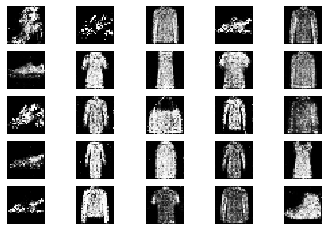

251 [D loss: 0.585762, acc.: 70.00%] [G loss: 1.262576]
252 [D loss: 0.560221, acc.: 65.00%] [G loss: 1.256199]
253 [D loss: 0.579463, acc.: 65.00%] [G loss: 1.315419]
254 [D loss: 0.531393, acc.: 67.50%] [G loss: 1.212506]
255 [D loss: 0.657311, acc.: 67.50%] [G loss: 1.012025]
256 [D loss: 0.640600, acc.: 70.00%] [G loss: 1.349480]
257 [D loss: 0.509357, acc.: 80.00%] [G loss: 1.145025]
258 [D loss: 0.595285, acc.: 60.00%] [G loss: 1.236014]
259 [D loss: 0.529169, acc.: 72.50%] [G loss: 1.271417]
260 [D loss: 0.472316, acc.: 80.00%] [G loss: 1.194133]
261 [D loss: 0.531350, acc.: 67.50%] [G loss: 1.170389]
262 [D loss: 0.638032, acc.: 60.00%] [G loss: 1.298681]
263 [D loss: 0.536739, acc.: 72.50%] [G loss: 1.270725]
264 [D loss: 0.597330, acc.: 70.00%] [G loss: 1.153574]
265 [D loss: 0.532903, acc.: 67.50%] [G loss: 1.121531]
266 [D loss: 0.629963, acc.: 67.50%] [G loss: 1.132286]
267 [D loss: 0.678949, acc.: 70.00%] [G loss: 1.118261]
268 [D loss: 0.589954, acc.: 67.50%] [G loss: 1.

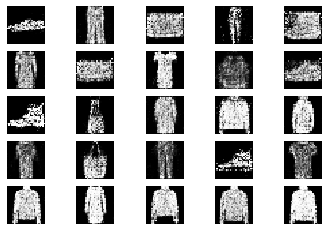

301 [D loss: 0.569369, acc.: 67.50%] [G loss: 1.110336]
302 [D loss: 0.673488, acc.: 60.00%] [G loss: 1.295847]
303 [D loss: 0.509242, acc.: 75.00%] [G loss: 1.174961]
304 [D loss: 0.601210, acc.: 67.50%] [G loss: 1.410210]
305 [D loss: 0.595975, acc.: 67.50%] [G loss: 1.028413]
306 [D loss: 0.618311, acc.: 62.50%] [G loss: 1.105752]
307 [D loss: 0.584361, acc.: 77.50%] [G loss: 1.287060]
308 [D loss: 0.582101, acc.: 77.50%] [G loss: 1.229304]
309 [D loss: 0.556523, acc.: 75.00%] [G loss: 1.109662]
310 [D loss: 0.453699, acc.: 80.00%] [G loss: 0.936229]
311 [D loss: 0.578110, acc.: 67.50%] [G loss: 1.155316]
312 [D loss: 0.637614, acc.: 67.50%] [G loss: 1.149108]
313 [D loss: 0.612884, acc.: 67.50%] [G loss: 1.414458]
314 [D loss: 0.603898, acc.: 67.50%] [G loss: 1.365073]
315 [D loss: 0.539313, acc.: 75.00%] [G loss: 1.282484]
316 [D loss: 0.612795, acc.: 70.00%] [G loss: 1.491414]
317 [D loss: 0.608837, acc.: 70.00%] [G loss: 1.184389]
318 [D loss: 0.575938, acc.: 65.00%] [G loss: 1.

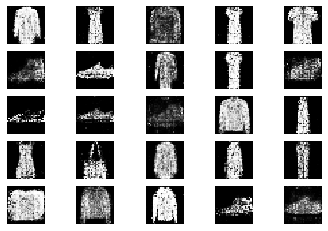

351 [D loss: 0.647330, acc.: 65.00%] [G loss: 1.130707]
352 [D loss: 0.552342, acc.: 75.00%] [G loss: 1.355083]
353 [D loss: 0.647014, acc.: 67.50%] [G loss: 1.186547]
354 [D loss: 0.580760, acc.: 60.00%] [G loss: 1.134984]
355 [D loss: 0.578165, acc.: 77.50%] [G loss: 1.074531]
356 [D loss: 0.531071, acc.: 82.50%] [G loss: 1.039580]
357 [D loss: 0.567785, acc.: 62.50%] [G loss: 1.074543]
358 [D loss: 0.632874, acc.: 60.00%] [G loss: 1.243177]
359 [D loss: 0.597637, acc.: 67.50%] [G loss: 1.258215]
360 [D loss: 0.543314, acc.: 75.00%] [G loss: 1.419393]
361 [D loss: 0.494616, acc.: 77.50%] [G loss: 1.415563]
362 [D loss: 0.675722, acc.: 57.50%] [G loss: 1.435078]
363 [D loss: 0.567712, acc.: 67.50%] [G loss: 1.464810]
364 [D loss: 0.575707, acc.: 75.00%] [G loss: 1.163511]
365 [D loss: 0.628740, acc.: 67.50%] [G loss: 1.249584]
366 [D loss: 0.517980, acc.: 75.00%] [G loss: 1.232779]
367 [D loss: 0.689323, acc.: 55.00%] [G loss: 1.320514]
368 [D loss: 0.618567, acc.: 67.50%] [G loss: 1.

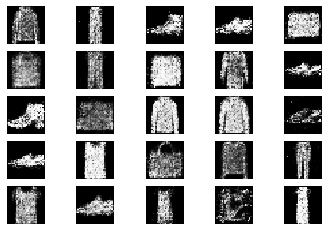

401 [D loss: 0.607808, acc.: 65.00%] [G loss: 1.232392]
402 [D loss: 0.583069, acc.: 67.50%] [G loss: 1.316025]
403 [D loss: 0.597248, acc.: 67.50%] [G loss: 1.255020]
404 [D loss: 0.556823, acc.: 77.50%] [G loss: 1.343011]
405 [D loss: 0.681653, acc.: 65.00%] [G loss: 1.060681]
406 [D loss: 0.502156, acc.: 75.00%] [G loss: 1.169470]
407 [D loss: 0.585878, acc.: 70.00%] [G loss: 1.258629]
408 [D loss: 0.689846, acc.: 57.50%] [G loss: 1.332092]
409 [D loss: 0.528139, acc.: 77.50%] [G loss: 1.515584]
410 [D loss: 0.783639, acc.: 50.00%] [G loss: 1.161358]
411 [D loss: 0.682375, acc.: 62.50%] [G loss: 1.248875]
412 [D loss: 0.633324, acc.: 67.50%] [G loss: 1.299937]
413 [D loss: 0.635784, acc.: 57.50%] [G loss: 1.154016]
414 [D loss: 0.542630, acc.: 67.50%] [G loss: 1.214322]
415 [D loss: 0.680620, acc.: 65.00%] [G loss: 1.284405]
416 [D loss: 0.505019, acc.: 77.50%] [G loss: 1.323801]
417 [D loss: 0.471400, acc.: 87.50%] [G loss: 1.376924]
418 [D loss: 0.623677, acc.: 67.50%] [G loss: 1.

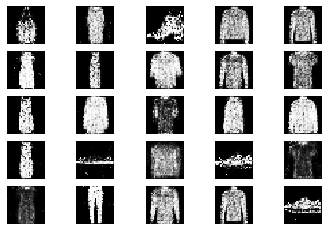

451 [D loss: 0.552244, acc.: 72.50%] [G loss: 1.171810]
452 [D loss: 0.687224, acc.: 60.00%] [G loss: 1.256630]
453 [D loss: 0.717266, acc.: 62.50%] [G loss: 1.269665]
454 [D loss: 0.466061, acc.: 82.50%] [G loss: 1.278595]
455 [D loss: 0.505991, acc.: 75.00%] [G loss: 1.346730]
456 [D loss: 0.533225, acc.: 70.00%] [G loss: 1.274253]
457 [D loss: 0.570081, acc.: 72.50%] [G loss: 1.281262]
458 [D loss: 0.496948, acc.: 72.50%] [G loss: 1.089000]
459 [D loss: 0.563160, acc.: 75.00%] [G loss: 1.196791]
460 [D loss: 0.644961, acc.: 62.50%] [G loss: 1.266145]
461 [D loss: 0.502254, acc.: 72.50%] [G loss: 1.251669]
462 [D loss: 0.539733, acc.: 67.50%] [G loss: 1.259895]
463 [D loss: 0.578451, acc.: 75.00%] [G loss: 1.352293]
464 [D loss: 0.582540, acc.: 75.00%] [G loss: 1.078735]
465 [D loss: 0.490216, acc.: 80.00%] [G loss: 1.162784]
466 [D loss: 0.551820, acc.: 72.50%] [G loss: 1.302760]
467 [D loss: 0.563465, acc.: 72.50%] [G loss: 1.220536]
468 [D loss: 0.632286, acc.: 67.50%] [G loss: 1.

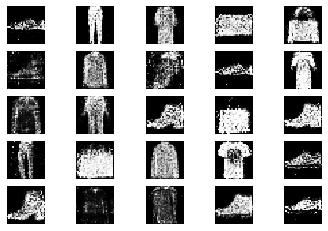

501 [D loss: 0.652753, acc.: 62.50%] [G loss: 1.473477]
502 [D loss: 0.574137, acc.: 75.00%] [G loss: 1.188216]
503 [D loss: 0.578893, acc.: 72.50%] [G loss: 1.173054]
504 [D loss: 0.612330, acc.: 72.50%] [G loss: 0.910181]
505 [D loss: 0.522867, acc.: 75.00%] [G loss: 1.035225]
506 [D loss: 0.405326, acc.: 85.00%] [G loss: 1.183218]
507 [D loss: 0.615450, acc.: 62.50%] [G loss: 1.318036]
508 [D loss: 0.510374, acc.: 72.50%] [G loss: 1.255316]
509 [D loss: 0.586983, acc.: 60.00%] [G loss: 1.145511]
510 [D loss: 0.569809, acc.: 67.50%] [G loss: 1.281008]
511 [D loss: 0.538824, acc.: 70.00%] [G loss: 1.333444]
512 [D loss: 0.658830, acc.: 57.50%] [G loss: 1.051932]
513 [D loss: 0.670872, acc.: 62.50%] [G loss: 1.156575]
514 [D loss: 0.563855, acc.: 70.00%] [G loss: 1.188060]
515 [D loss: 0.528140, acc.: 80.00%] [G loss: 1.156071]
516 [D loss: 0.540648, acc.: 72.50%] [G loss: 1.104097]
517 [D loss: 0.627959, acc.: 65.00%] [G loss: 1.187755]
518 [D loss: 0.638512, acc.: 60.00%] [G loss: 1.

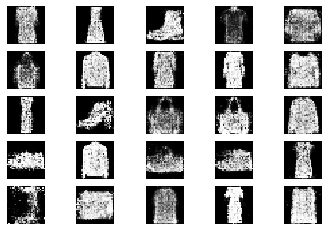

551 [D loss: 0.574724, acc.: 62.50%] [G loss: 1.421028]
552 [D loss: 0.570870, acc.: 65.00%] [G loss: 1.430921]
553 [D loss: 0.589136, acc.: 70.00%] [G loss: 1.203160]
554 [D loss: 0.608972, acc.: 67.50%] [G loss: 1.038092]
555 [D loss: 0.572786, acc.: 65.00%] [G loss: 1.282062]
556 [D loss: 0.537750, acc.: 65.00%] [G loss: 1.335652]
557 [D loss: 0.524904, acc.: 67.50%] [G loss: 1.145769]
558 [D loss: 0.637822, acc.: 65.00%] [G loss: 1.380048]
559 [D loss: 0.604563, acc.: 67.50%] [G loss: 1.001302]
560 [D loss: 0.474776, acc.: 80.00%] [G loss: 1.207408]
561 [D loss: 0.523769, acc.: 75.00%] [G loss: 1.252600]
562 [D loss: 0.699814, acc.: 55.00%] [G loss: 1.227829]
563 [D loss: 0.501698, acc.: 80.00%] [G loss: 1.271252]
564 [D loss: 0.655657, acc.: 62.50%] [G loss: 1.449588]
565 [D loss: 0.474624, acc.: 70.00%] [G loss: 1.352185]
566 [D loss: 0.677866, acc.: 55.00%] [G loss: 1.249832]
567 [D loss: 0.410257, acc.: 85.00%] [G loss: 1.413363]
568 [D loss: 0.464624, acc.: 85.00%] [G loss: 1.

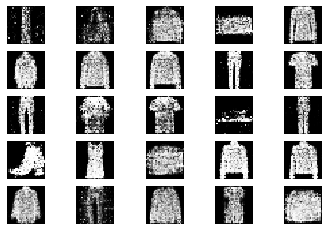

601 [D loss: 0.512538, acc.: 75.00%] [G loss: 1.273651]
602 [D loss: 0.638526, acc.: 62.50%] [G loss: 1.316600]
603 [D loss: 0.574951, acc.: 70.00%] [G loss: 1.262709]
604 [D loss: 0.480792, acc.: 82.50%] [G loss: 1.245673]
605 [D loss: 0.548275, acc.: 70.00%] [G loss: 1.183199]
606 [D loss: 0.681003, acc.: 60.00%] [G loss: 1.209187]
607 [D loss: 0.589161, acc.: 67.50%] [G loss: 1.215289]
608 [D loss: 0.662801, acc.: 67.50%] [G loss: 1.321241]
609 [D loss: 0.574756, acc.: 67.50%] [G loss: 1.227719]
610 [D loss: 0.565831, acc.: 77.50%] [G loss: 1.048120]
611 [D loss: 0.515354, acc.: 77.50%] [G loss: 1.174631]
612 [D loss: 0.562080, acc.: 70.00%] [G loss: 1.330459]
613 [D loss: 0.444101, acc.: 80.00%] [G loss: 1.233755]
614 [D loss: 0.590187, acc.: 70.00%] [G loss: 1.268291]
615 [D loss: 0.600250, acc.: 67.50%] [G loss: 1.158545]
616 [D loss: 0.481280, acc.: 77.50%] [G loss: 1.307283]
617 [D loss: 0.612401, acc.: 70.00%] [G loss: 1.175847]
618 [D loss: 0.563301, acc.: 67.50%] [G loss: 1.

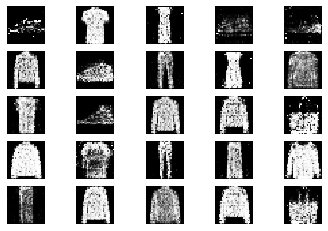

651 [D loss: 0.586101, acc.: 65.00%] [G loss: 1.122453]
652 [D loss: 0.598893, acc.: 65.00%] [G loss: 1.078758]
653 [D loss: 0.541880, acc.: 72.50%] [G loss: 1.265605]
654 [D loss: 0.531103, acc.: 67.50%] [G loss: 1.283612]
655 [D loss: 0.587516, acc.: 72.50%] [G loss: 1.143873]
656 [D loss: 0.543259, acc.: 65.00%] [G loss: 1.150363]
657 [D loss: 0.549517, acc.: 67.50%] [G loss: 1.228329]
658 [D loss: 0.634813, acc.: 67.50%] [G loss: 1.105096]
659 [D loss: 0.562187, acc.: 65.00%] [G loss: 1.137246]
660 [D loss: 0.622813, acc.: 65.00%] [G loss: 1.174263]
661 [D loss: 0.570995, acc.: 70.00%] [G loss: 1.043987]
662 [D loss: 0.468404, acc.: 80.00%] [G loss: 1.323116]
663 [D loss: 0.617556, acc.: 65.00%] [G loss: 1.150627]
664 [D loss: 0.507834, acc.: 80.00%] [G loss: 1.421928]
665 [D loss: 0.607043, acc.: 60.00%] [G loss: 1.137664]
666 [D loss: 0.555560, acc.: 72.50%] [G loss: 1.335377]
667 [D loss: 0.679776, acc.: 60.00%] [G loss: 1.161867]
668 [D loss: 0.588930, acc.: 60.00%] [G loss: 1.

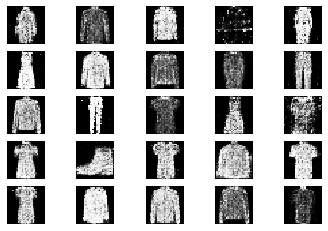

701 [D loss: 0.617101, acc.: 65.00%] [G loss: 1.192998]
702 [D loss: 0.518702, acc.: 80.00%] [G loss: 1.108516]
703 [D loss: 0.680857, acc.: 52.50%] [G loss: 1.204905]
704 [D loss: 0.733641, acc.: 55.00%] [G loss: 1.439775]
705 [D loss: 0.598880, acc.: 65.00%] [G loss: 1.067029]
706 [D loss: 0.619769, acc.: 65.00%] [G loss: 1.272322]
707 [D loss: 0.580439, acc.: 70.00%] [G loss: 1.195066]
708 [D loss: 0.547109, acc.: 67.50%] [G loss: 1.015778]
709 [D loss: 0.525225, acc.: 72.50%] [G loss: 1.181107]
710 [D loss: 0.570741, acc.: 75.00%] [G loss: 1.064543]
711 [D loss: 0.543055, acc.: 70.00%] [G loss: 1.138335]
712 [D loss: 0.667051, acc.: 52.50%] [G loss: 1.041724]
713 [D loss: 0.683108, acc.: 57.50%] [G loss: 0.926291]
714 [D loss: 0.554846, acc.: 65.00%] [G loss: 1.107029]
715 [D loss: 0.523091, acc.: 72.50%] [G loss: 1.314841]
716 [D loss: 0.508945, acc.: 80.00%] [G loss: 1.325532]
717 [D loss: 0.486991, acc.: 80.00%] [G loss: 1.355059]
718 [D loss: 0.517857, acc.: 72.50%] [G loss: 1.

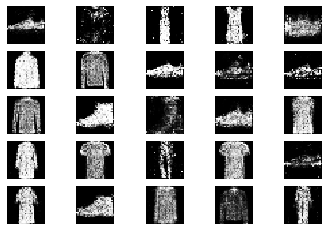

751 [D loss: 0.526087, acc.: 70.00%] [G loss: 1.226589]
752 [D loss: 0.465863, acc.: 75.00%] [G loss: 1.347393]
753 [D loss: 0.667348, acc.: 60.00%] [G loss: 1.095247]
754 [D loss: 0.586691, acc.: 65.00%] [G loss: 1.151137]
755 [D loss: 0.646888, acc.: 67.50%] [G loss: 1.280537]
756 [D loss: 0.518346, acc.: 67.50%] [G loss: 1.286729]
757 [D loss: 0.521819, acc.: 72.50%] [G loss: 1.360950]
758 [D loss: 0.708643, acc.: 55.00%] [G loss: 1.239567]
759 [D loss: 0.541711, acc.: 67.50%] [G loss: 1.195845]
760 [D loss: 0.514088, acc.: 70.00%] [G loss: 1.085656]
761 [D loss: 0.537377, acc.: 72.50%] [G loss: 1.098950]
762 [D loss: 0.701404, acc.: 52.50%] [G loss: 1.138242]
763 [D loss: 0.668373, acc.: 60.00%] [G loss: 1.254777]
764 [D loss: 0.590603, acc.: 62.50%] [G loss: 1.181776]
765 [D loss: 0.588350, acc.: 67.50%] [G loss: 1.319034]
766 [D loss: 0.658777, acc.: 67.50%] [G loss: 1.040098]
767 [D loss: 0.576297, acc.: 70.00%] [G loss: 1.172317]
768 [D loss: 0.660055, acc.: 57.50%] [G loss: 1.

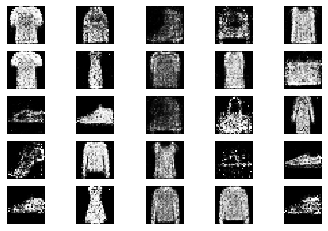

801 [D loss: 0.669741, acc.: 60.00%] [G loss: 0.979812]
802 [D loss: 0.701021, acc.: 50.00%] [G loss: 1.025929]
803 [D loss: 0.563613, acc.: 72.50%] [G loss: 1.099489]
804 [D loss: 0.638089, acc.: 55.00%] [G loss: 1.240259]
805 [D loss: 0.569428, acc.: 67.50%] [G loss: 1.338273]
806 [D loss: 0.549644, acc.: 77.50%] [G loss: 1.160169]
807 [D loss: 0.438633, acc.: 87.50%] [G loss: 1.241700]
808 [D loss: 0.669819, acc.: 70.00%] [G loss: 1.248960]
809 [D loss: 0.542315, acc.: 70.00%] [G loss: 1.234162]
810 [D loss: 0.554290, acc.: 67.50%] [G loss: 1.169532]
811 [D loss: 0.608904, acc.: 60.00%] [G loss: 1.354054]
812 [D loss: 0.613466, acc.: 65.00%] [G loss: 1.155236]
813 [D loss: 0.495666, acc.: 70.00%] [G loss: 1.349276]
814 [D loss: 0.533283, acc.: 72.50%] [G loss: 1.328147]
815 [D loss: 0.547671, acc.: 72.50%] [G loss: 1.396717]
816 [D loss: 0.744429, acc.: 55.00%] [G loss: 1.294904]
817 [D loss: 0.557176, acc.: 70.00%] [G loss: 1.190665]
818 [D loss: 0.534170, acc.: 70.00%] [G loss: 1.

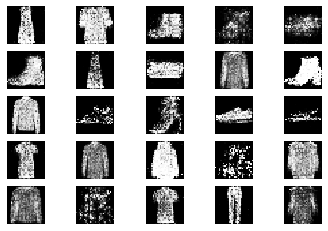

851 [D loss: 0.648558, acc.: 60.00%] [G loss: 1.379422]
852 [D loss: 0.530624, acc.: 72.50%] [G loss: 1.230969]
853 [D loss: 0.526277, acc.: 72.50%] [G loss: 1.190961]
854 [D loss: 0.633555, acc.: 65.00%] [G loss: 1.156059]
855 [D loss: 0.561610, acc.: 72.50%] [G loss: 1.335873]
856 [D loss: 0.604547, acc.: 62.50%] [G loss: 1.219407]
857 [D loss: 0.639751, acc.: 65.00%] [G loss: 1.140631]
858 [D loss: 0.494282, acc.: 80.00%] [G loss: 1.105558]
859 [D loss: 0.580630, acc.: 70.00%] [G loss: 1.111556]
860 [D loss: 0.681352, acc.: 62.50%] [G loss: 1.184592]
861 [D loss: 0.517309, acc.: 75.00%] [G loss: 1.235217]
862 [D loss: 0.606215, acc.: 57.50%] [G loss: 1.151354]
863 [D loss: 0.614674, acc.: 65.00%] [G loss: 1.162944]
864 [D loss: 0.591250, acc.: 62.50%] [G loss: 1.287725]
865 [D loss: 0.540726, acc.: 75.00%] [G loss: 1.378657]
866 [D loss: 0.692945, acc.: 60.00%] [G loss: 1.342171]
867 [D loss: 0.526067, acc.: 70.00%] [G loss: 1.427263]
868 [D loss: 0.582756, acc.: 67.50%] [G loss: 1.

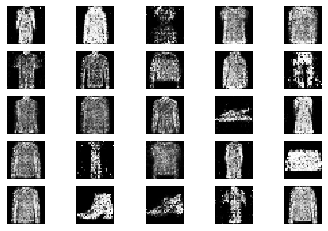

901 [D loss: 0.547602, acc.: 80.00%] [G loss: 1.235540]
902 [D loss: 0.623766, acc.: 67.50%] [G loss: 1.014682]
903 [D loss: 0.548908, acc.: 67.50%] [G loss: 1.217941]
904 [D loss: 0.685949, acc.: 62.50%] [G loss: 1.106787]
905 [D loss: 0.538250, acc.: 72.50%] [G loss: 1.254299]
906 [D loss: 0.665455, acc.: 62.50%] [G loss: 1.381057]
907 [D loss: 0.608193, acc.: 72.50%] [G loss: 1.139556]
908 [D loss: 0.590296, acc.: 67.50%] [G loss: 1.143113]
909 [D loss: 0.453800, acc.: 77.50%] [G loss: 1.089848]
910 [D loss: 0.553284, acc.: 65.00%] [G loss: 1.108037]
911 [D loss: 0.552951, acc.: 70.00%] [G loss: 1.119269]
912 [D loss: 0.609893, acc.: 62.50%] [G loss: 0.993488]
913 [D loss: 0.512392, acc.: 72.50%] [G loss: 1.042160]
914 [D loss: 0.601583, acc.: 75.00%] [G loss: 1.247805]
915 [D loss: 0.421614, acc.: 85.00%] [G loss: 1.301117]
916 [D loss: 0.609982, acc.: 62.50%] [G loss: 1.253410]
917 [D loss: 0.550941, acc.: 75.00%] [G loss: 1.297131]
918 [D loss: 0.670926, acc.: 62.50%] [G loss: 1.

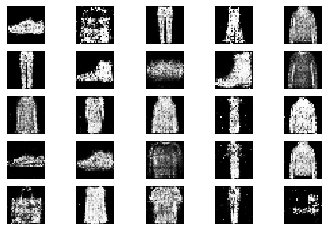

951 [D loss: 0.674650, acc.: 67.50%] [G loss: 1.228550]
952 [D loss: 0.575734, acc.: 70.00%] [G loss: 1.289156]
953 [D loss: 0.541708, acc.: 75.00%] [G loss: 1.074482]
954 [D loss: 0.610993, acc.: 70.00%] [G loss: 1.079628]
955 [D loss: 0.573860, acc.: 70.00%] [G loss: 1.219301]
956 [D loss: 0.538131, acc.: 80.00%] [G loss: 1.198786]
957 [D loss: 0.652863, acc.: 62.50%] [G loss: 1.238409]
958 [D loss: 0.686967, acc.: 60.00%] [G loss: 1.128952]
959 [D loss: 0.581986, acc.: 62.50%] [G loss: 1.185918]
960 [D loss: 0.532917, acc.: 72.50%] [G loss: 1.122384]
961 [D loss: 0.688757, acc.: 50.00%] [G loss: 1.406162]
962 [D loss: 0.443905, acc.: 82.50%] [G loss: 1.262309]
963 [D loss: 0.632088, acc.: 57.50%] [G loss: 1.283408]
964 [D loss: 0.562852, acc.: 75.00%] [G loss: 1.216451]
965 [D loss: 0.497340, acc.: 75.00%] [G loss: 1.375140]
966 [D loss: 0.529333, acc.: 75.00%] [G loss: 1.156970]
967 [D loss: 0.459375, acc.: 80.00%] [G loss: 1.209473]
968 [D loss: 0.603231, acc.: 65.00%] [G loss: 1.

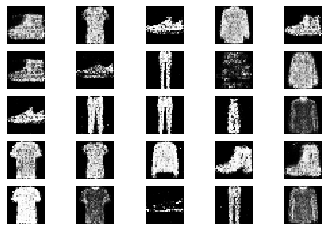

1001 [D loss: 0.519555, acc.: 75.00%] [G loss: 1.164921]
1002 [D loss: 0.509555, acc.: 82.50%] [G loss: 1.135177]
1003 [D loss: 0.559214, acc.: 67.50%] [G loss: 1.316614]
1004 [D loss: 0.733288, acc.: 52.50%] [G loss: 1.101898]
1005 [D loss: 0.469053, acc.: 77.50%] [G loss: 1.386705]
1006 [D loss: 0.577905, acc.: 65.00%] [G loss: 1.008649]
1007 [D loss: 0.695677, acc.: 62.50%] [G loss: 1.181872]
1008 [D loss: 0.527158, acc.: 75.00%] [G loss: 1.074337]
1009 [D loss: 0.512619, acc.: 77.50%] [G loss: 1.202463]
1010 [D loss: 0.418162, acc.: 82.50%] [G loss: 1.265726]
1011 [D loss: 0.531201, acc.: 70.00%] [G loss: 1.175953]
1012 [D loss: 0.523100, acc.: 80.00%] [G loss: 1.322067]
1013 [D loss: 0.534631, acc.: 67.50%] [G loss: 1.094934]
1014 [D loss: 0.506122, acc.: 77.50%] [G loss: 1.275211]
1015 [D loss: 0.625403, acc.: 70.00%] [G loss: 1.019743]
1016 [D loss: 0.557381, acc.: 70.00%] [G loss: 1.110795]
1017 [D loss: 0.600150, acc.: 70.00%] [G loss: 1.064475]
1018 [D loss: 0.554477, acc.: 6

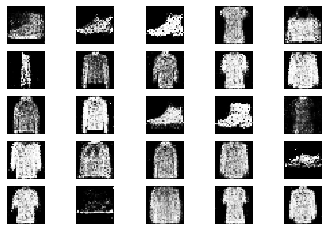

1051 [D loss: 0.594934, acc.: 62.50%] [G loss: 1.261026]
1052 [D loss: 0.574381, acc.: 70.00%] [G loss: 1.142111]
1053 [D loss: 0.449462, acc.: 82.50%] [G loss: 1.165358]
1054 [D loss: 0.626494, acc.: 70.00%] [G loss: 1.103582]
1055 [D loss: 0.571560, acc.: 67.50%] [G loss: 1.455577]
1056 [D loss: 0.691093, acc.: 65.00%] [G loss: 1.284282]
1057 [D loss: 0.659176, acc.: 65.00%] [G loss: 1.121822]
1058 [D loss: 0.552196, acc.: 72.50%] [G loss: 1.016840]
1059 [D loss: 0.590817, acc.: 62.50%] [G loss: 1.231764]
1060 [D loss: 0.606246, acc.: 57.50%] [G loss: 1.245094]
1061 [D loss: 0.524183, acc.: 70.00%] [G loss: 1.491753]
1062 [D loss: 0.597375, acc.: 62.50%] [G loss: 1.250315]
1063 [D loss: 0.533772, acc.: 80.00%] [G loss: 1.091586]
1064 [D loss: 0.716980, acc.: 62.50%] [G loss: 1.126848]
1065 [D loss: 0.576838, acc.: 70.00%] [G loss: 1.240964]
1066 [D loss: 0.554067, acc.: 70.00%] [G loss: 0.995258]
1067 [D loss: 0.550325, acc.: 72.50%] [G loss: 1.042913]
1068 [D loss: 0.706988, acc.: 6

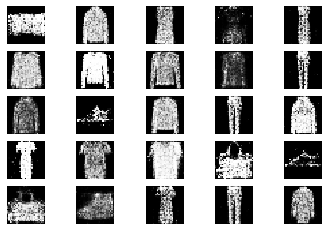

1101 [D loss: 0.553183, acc.: 77.50%] [G loss: 1.298497]
1102 [D loss: 0.546217, acc.: 72.50%] [G loss: 1.239187]
1103 [D loss: 0.516228, acc.: 72.50%] [G loss: 1.152806]
1104 [D loss: 0.650516, acc.: 65.00%] [G loss: 1.032619]
1105 [D loss: 0.634467, acc.: 65.00%] [G loss: 1.214582]
1106 [D loss: 0.505702, acc.: 75.00%] [G loss: 1.086764]
1107 [D loss: 0.513986, acc.: 72.50%] [G loss: 1.308195]
1108 [D loss: 0.704363, acc.: 60.00%] [G loss: 1.114806]
1109 [D loss: 0.519397, acc.: 75.00%] [G loss: 1.252837]
1110 [D loss: 0.528913, acc.: 72.50%] [G loss: 1.284944]
1111 [D loss: 0.550209, acc.: 70.00%] [G loss: 1.292401]
1112 [D loss: 0.551164, acc.: 75.00%] [G loss: 1.092912]
1113 [D loss: 0.543766, acc.: 80.00%] [G loss: 1.103484]
1114 [D loss: 0.551642, acc.: 75.00%] [G loss: 1.142910]
1115 [D loss: 0.547232, acc.: 70.00%] [G loss: 1.126958]
1116 [D loss: 0.554653, acc.: 70.00%] [G loss: 1.304206]
1117 [D loss: 0.519402, acc.: 77.50%] [G loss: 1.376831]
1118 [D loss: 0.462730, acc.: 8

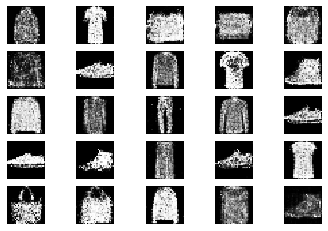

1151 [D loss: 0.567072, acc.: 67.50%] [G loss: 1.030683]
1152 [D loss: 0.603052, acc.: 62.50%] [G loss: 1.072373]
1153 [D loss: 0.583843, acc.: 75.00%] [G loss: 1.005006]
1154 [D loss: 0.457033, acc.: 82.50%] [G loss: 1.201545]
1155 [D loss: 0.475754, acc.: 72.50%] [G loss: 1.243121]
1156 [D loss: 0.548945, acc.: 82.50%] [G loss: 1.309437]
1157 [D loss: 0.609630, acc.: 70.00%] [G loss: 1.317623]
1158 [D loss: 0.547697, acc.: 67.50%] [G loss: 1.314957]
1159 [D loss: 0.537289, acc.: 67.50%] [G loss: 1.226762]
1160 [D loss: 0.593547, acc.: 65.00%] [G loss: 1.199270]
1161 [D loss: 0.471578, acc.: 77.50%] [G loss: 1.117527]
1162 [D loss: 0.658175, acc.: 57.50%] [G loss: 1.076421]
1163 [D loss: 0.590563, acc.: 70.00%] [G loss: 1.185616]
1164 [D loss: 0.579410, acc.: 67.50%] [G loss: 1.136207]
1165 [D loss: 0.616901, acc.: 65.00%] [G loss: 1.005337]
1166 [D loss: 0.580887, acc.: 65.00%] [G loss: 1.197214]
1167 [D loss: 0.487974, acc.: 80.00%] [G loss: 1.158329]
1168 [D loss: 0.599007, acc.: 7

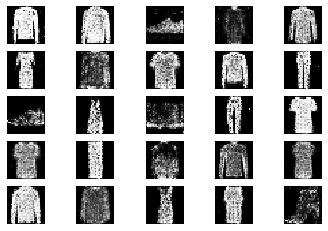

1201 [D loss: 0.598605, acc.: 67.50%] [G loss: 1.329030]
1202 [D loss: 0.537995, acc.: 72.50%] [G loss: 1.290110]
1203 [D loss: 0.532471, acc.: 72.50%] [G loss: 1.198696]
1204 [D loss: 0.609576, acc.: 55.00%] [G loss: 1.311702]
1205 [D loss: 0.527587, acc.: 75.00%] [G loss: 1.088477]
1206 [D loss: 0.645328, acc.: 62.50%] [G loss: 1.128062]
1207 [D loss: 0.598254, acc.: 67.50%] [G loss: 1.201690]
1208 [D loss: 0.671923, acc.: 50.00%] [G loss: 1.289228]
1209 [D loss: 0.648077, acc.: 60.00%] [G loss: 1.134888]
1210 [D loss: 0.635303, acc.: 70.00%] [G loss: 1.337612]
1211 [D loss: 0.512061, acc.: 70.00%] [G loss: 1.143242]
1212 [D loss: 0.527996, acc.: 70.00%] [G loss: 1.322493]
1213 [D loss: 0.550881, acc.: 70.00%] [G loss: 1.183008]
1214 [D loss: 0.586618, acc.: 65.00%] [G loss: 0.962898]
1215 [D loss: 0.567265, acc.: 67.50%] [G loss: 1.003075]
1216 [D loss: 0.501511, acc.: 80.00%] [G loss: 1.301081]
1217 [D loss: 0.538012, acc.: 70.00%] [G loss: 1.439232]
1218 [D loss: 0.513857, acc.: 8

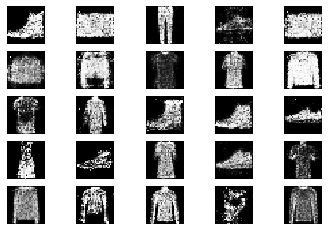

1251 [D loss: 0.594271, acc.: 62.50%] [G loss: 1.107798]
1252 [D loss: 0.608540, acc.: 70.00%] [G loss: 1.223114]
1253 [D loss: 0.420189, acc.: 82.50%] [G loss: 1.394390]
1254 [D loss: 0.566145, acc.: 77.50%] [G loss: 1.350747]
1255 [D loss: 0.560675, acc.: 72.50%] [G loss: 1.129311]
1256 [D loss: 0.703347, acc.: 57.50%] [G loss: 1.118297]
1257 [D loss: 0.709218, acc.: 57.50%] [G loss: 1.130344]
1258 [D loss: 0.497807, acc.: 77.50%] [G loss: 1.081123]
1259 [D loss: 0.563820, acc.: 70.00%] [G loss: 1.107693]
1260 [D loss: 0.711736, acc.: 62.50%] [G loss: 1.036776]
1261 [D loss: 0.636608, acc.: 70.00%] [G loss: 1.134184]
1262 [D loss: 0.658162, acc.: 65.00%] [G loss: 1.240136]
1263 [D loss: 0.605888, acc.: 67.50%] [G loss: 1.059232]
1264 [D loss: 0.559486, acc.: 70.00%] [G loss: 1.290210]
1265 [D loss: 0.687317, acc.: 57.50%] [G loss: 1.220897]
1266 [D loss: 0.614687, acc.: 67.50%] [G loss: 1.270308]
1267 [D loss: 0.571799, acc.: 75.00%] [G loss: 1.384578]
1268 [D loss: 0.559019, acc.: 7

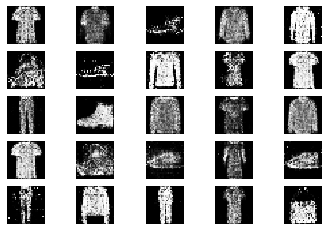

1301 [D loss: 0.687334, acc.: 65.00%] [G loss: 1.238007]
1302 [D loss: 0.645166, acc.: 62.50%] [G loss: 1.118148]
1303 [D loss: 0.570577, acc.: 70.00%] [G loss: 1.155698]
1304 [D loss: 0.648426, acc.: 52.50%] [G loss: 1.098970]
1305 [D loss: 0.586845, acc.: 70.00%] [G loss: 0.963692]
1306 [D loss: 0.481760, acc.: 77.50%] [G loss: 1.066683]
1307 [D loss: 0.570014, acc.: 65.00%] [G loss: 1.141630]
1308 [D loss: 0.623951, acc.: 65.00%] [G loss: 1.065905]
1309 [D loss: 0.437865, acc.: 80.00%] [G loss: 0.991846]
1310 [D loss: 0.690422, acc.: 67.50%] [G loss: 1.064037]
1311 [D loss: 0.561574, acc.: 72.50%] [G loss: 1.215998]
1312 [D loss: 0.597203, acc.: 65.00%] [G loss: 1.275344]
1313 [D loss: 0.616003, acc.: 65.00%] [G loss: 1.218128]
1314 [D loss: 0.625666, acc.: 52.50%] [G loss: 1.202113]
1315 [D loss: 0.630715, acc.: 67.50%] [G loss: 1.277373]
1316 [D loss: 0.643588, acc.: 70.00%] [G loss: 1.091053]
1317 [D loss: 0.615476, acc.: 60.00%] [G loss: 1.375963]
1318 [D loss: 0.645609, acc.: 7

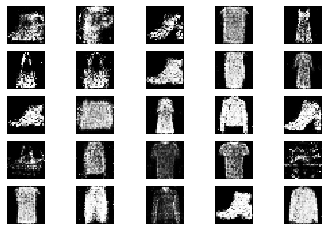

1351 [D loss: 0.600134, acc.: 72.50%] [G loss: 1.401116]
1352 [D loss: 0.553364, acc.: 72.50%] [G loss: 1.572515]
1353 [D loss: 0.531934, acc.: 77.50%] [G loss: 1.341175]
1354 [D loss: 0.645502, acc.: 72.50%] [G loss: 1.114226]
1355 [D loss: 0.469852, acc.: 82.50%] [G loss: 1.189738]
1356 [D loss: 0.542665, acc.: 72.50%] [G loss: 1.283485]
1357 [D loss: 0.532472, acc.: 67.50%] [G loss: 1.195613]
1358 [D loss: 0.637285, acc.: 62.50%] [G loss: 1.212933]
1359 [D loss: 0.596970, acc.: 60.00%] [G loss: 1.178348]
1360 [D loss: 0.515295, acc.: 72.50%] [G loss: 1.266195]
1361 [D loss: 0.666314, acc.: 67.50%] [G loss: 1.211711]
1362 [D loss: 0.565224, acc.: 65.00%] [G loss: 1.192223]
1363 [D loss: 0.584131, acc.: 70.00%] [G loss: 1.258486]
1364 [D loss: 0.575498, acc.: 62.50%] [G loss: 1.083414]
1365 [D loss: 0.625682, acc.: 65.00%] [G loss: 1.076392]
1366 [D loss: 0.652941, acc.: 57.50%] [G loss: 1.131410]
1367 [D loss: 0.712588, acc.: 57.50%] [G loss: 1.286037]
1368 [D loss: 0.584647, acc.: 6

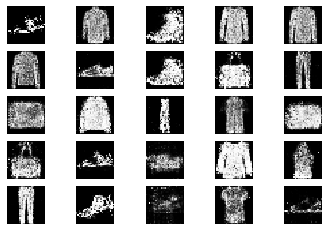

1401 [D loss: 0.584355, acc.: 67.50%] [G loss: 1.150555]
1402 [D loss: 0.624584, acc.: 62.50%] [G loss: 1.158661]
1403 [D loss: 0.551187, acc.: 80.00%] [G loss: 0.893521]
1404 [D loss: 0.523701, acc.: 75.00%] [G loss: 1.118021]
1405 [D loss: 0.503935, acc.: 77.50%] [G loss: 1.199783]
1406 [D loss: 0.662345, acc.: 57.50%] [G loss: 1.093954]
1407 [D loss: 0.478837, acc.: 77.50%] [G loss: 1.347260]
1408 [D loss: 0.505929, acc.: 77.50%] [G loss: 1.099041]
1409 [D loss: 0.648917, acc.: 65.00%] [G loss: 1.223877]
1410 [D loss: 0.431724, acc.: 87.50%] [G loss: 1.016418]
1411 [D loss: 0.641732, acc.: 62.50%] [G loss: 0.979732]
1412 [D loss: 0.597574, acc.: 67.50%] [G loss: 1.184532]
1413 [D loss: 0.520490, acc.: 72.50%] [G loss: 1.197167]
1414 [D loss: 0.579117, acc.: 75.00%] [G loss: 1.182437]
1415 [D loss: 0.770568, acc.: 45.00%] [G loss: 1.323758]
1416 [D loss: 0.458646, acc.: 85.00%] [G loss: 1.407305]
1417 [D loss: 0.446826, acc.: 85.00%] [G loss: 1.217263]
1418 [D loss: 0.680060, acc.: 5

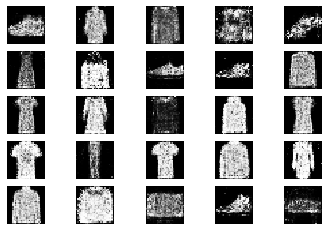

1451 [D loss: 0.810758, acc.: 47.50%] [G loss: 1.095325]
1452 [D loss: 0.603781, acc.: 65.00%] [G loss: 1.150496]
1453 [D loss: 0.556082, acc.: 70.00%] [G loss: 1.113587]
1454 [D loss: 0.598835, acc.: 72.50%] [G loss: 1.035296]
1455 [D loss: 0.669718, acc.: 62.50%] [G loss: 1.106203]
1456 [D loss: 0.579232, acc.: 62.50%] [G loss: 1.145838]
1457 [D loss: 0.459928, acc.: 87.50%] [G loss: 1.124808]
1458 [D loss: 0.638446, acc.: 60.00%] [G loss: 1.112496]
1459 [D loss: 0.600672, acc.: 67.50%] [G loss: 1.154884]
1460 [D loss: 0.542704, acc.: 70.00%] [G loss: 1.336850]
1461 [D loss: 0.594781, acc.: 67.50%] [G loss: 1.151142]
1462 [D loss: 0.578280, acc.: 67.50%] [G loss: 1.204627]
1463 [D loss: 0.555398, acc.: 67.50%] [G loss: 1.041331]
1464 [D loss: 0.472268, acc.: 82.50%] [G loss: 1.091291]
1465 [D loss: 0.503955, acc.: 82.50%] [G loss: 1.184539]
1466 [D loss: 0.673058, acc.: 57.50%] [G loss: 1.153056]
1467 [D loss: 0.624090, acc.: 67.50%] [G loss: 1.119842]
1468 [D loss: 0.678658, acc.: 6

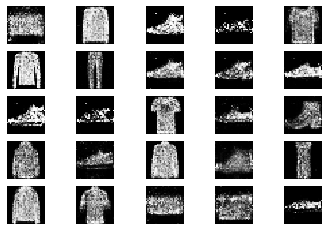

1501 [D loss: 0.631020, acc.: 72.50%] [G loss: 1.016465]
1502 [D loss: 0.494313, acc.: 77.50%] [G loss: 1.126135]
1503 [D loss: 0.550105, acc.: 67.50%] [G loss: 1.206517]
1504 [D loss: 0.569033, acc.: 70.00%] [G loss: 1.183866]
1505 [D loss: 0.621703, acc.: 60.00%] [G loss: 1.417271]
1506 [D loss: 0.714768, acc.: 65.00%] [G loss: 1.470593]
1507 [D loss: 0.575341, acc.: 72.50%] [G loss: 1.367058]
1508 [D loss: 0.595069, acc.: 65.00%] [G loss: 1.165211]
1509 [D loss: 0.577402, acc.: 72.50%] [G loss: 1.172042]
1510 [D loss: 0.585529, acc.: 67.50%] [G loss: 0.912804]
1511 [D loss: 0.662330, acc.: 72.50%] [G loss: 1.216967]
1512 [D loss: 0.643173, acc.: 62.50%] [G loss: 1.168300]
1513 [D loss: 0.640160, acc.: 67.50%] [G loss: 1.082398]
1514 [D loss: 0.679215, acc.: 52.50%] [G loss: 1.215891]
1515 [D loss: 0.592851, acc.: 65.00%] [G loss: 1.206558]
1516 [D loss: 0.653284, acc.: 60.00%] [G loss: 1.113137]
1517 [D loss: 0.722954, acc.: 62.50%] [G loss: 1.165841]
1518 [D loss: 0.542896, acc.: 7

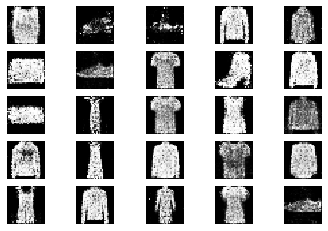

1551 [D loss: 0.673402, acc.: 60.00%] [G loss: 1.189666]
1552 [D loss: 0.594063, acc.: 62.50%] [G loss: 1.064707]
1553 [D loss: 0.593766, acc.: 70.00%] [G loss: 1.209090]
1554 [D loss: 0.646517, acc.: 65.00%] [G loss: 1.141585]
1555 [D loss: 0.568675, acc.: 70.00%] [G loss: 1.257263]
1556 [D loss: 0.515417, acc.: 77.50%] [G loss: 1.281902]
1557 [D loss: 0.668347, acc.: 65.00%] [G loss: 1.239367]
1558 [D loss: 0.696618, acc.: 57.50%] [G loss: 1.108909]
1559 [D loss: 0.639870, acc.: 62.50%] [G loss: 1.122189]
1560 [D loss: 0.534885, acc.: 67.50%] [G loss: 1.152180]
1561 [D loss: 0.571811, acc.: 70.00%] [G loss: 1.207873]
1562 [D loss: 0.577577, acc.: 67.50%] [G loss: 1.103217]
1563 [D loss: 0.694851, acc.: 62.50%] [G loss: 1.153486]
1564 [D loss: 0.569169, acc.: 62.50%] [G loss: 1.049910]
1565 [D loss: 0.618965, acc.: 70.00%] [G loss: 1.178297]
1566 [D loss: 0.642223, acc.: 67.50%] [G loss: 1.134057]
1567 [D loss: 0.635212, acc.: 67.50%] [G loss: 1.099500]
1568 [D loss: 0.599838, acc.: 7

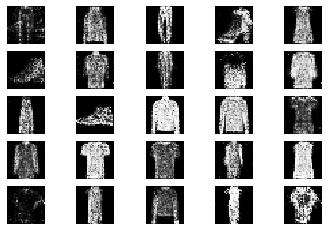

1601 [D loss: 0.626310, acc.: 62.50%] [G loss: 1.233757]
1602 [D loss: 0.526427, acc.: 72.50%] [G loss: 1.376687]
1603 [D loss: 0.558303, acc.: 70.00%] [G loss: 1.258670]
1604 [D loss: 0.582371, acc.: 60.00%] [G loss: 1.478241]
1605 [D loss: 0.568121, acc.: 70.00%] [G loss: 1.256264]
1606 [D loss: 0.587492, acc.: 65.00%] [G loss: 1.139010]
1607 [D loss: 0.586668, acc.: 77.50%] [G loss: 1.309225]
1608 [D loss: 0.500337, acc.: 72.50%] [G loss: 1.318421]
1609 [D loss: 0.574565, acc.: 70.00%] [G loss: 1.272794]
1610 [D loss: 0.634886, acc.: 65.00%] [G loss: 1.126253]
1611 [D loss: 0.526617, acc.: 80.00%] [G loss: 1.259683]
1612 [D loss: 0.504460, acc.: 77.50%] [G loss: 1.116993]
1613 [D loss: 0.510890, acc.: 77.50%] [G loss: 1.367125]
1614 [D loss: 0.561485, acc.: 70.00%] [G loss: 1.144819]
1615 [D loss: 0.595420, acc.: 65.00%] [G loss: 1.122643]
1616 [D loss: 0.550022, acc.: 77.50%] [G loss: 1.220485]
1617 [D loss: 0.564872, acc.: 70.00%] [G loss: 1.107821]
1618 [D loss: 0.497302, acc.: 7

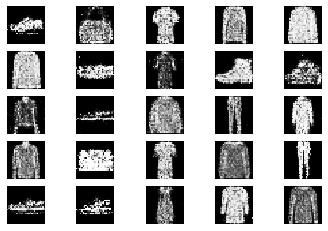

1651 [D loss: 0.489496, acc.: 77.50%] [G loss: 1.426164]
1652 [D loss: 0.639931, acc.: 67.50%] [G loss: 1.324924]
1653 [D loss: 0.637253, acc.: 70.00%] [G loss: 1.158311]
1654 [D loss: 0.510624, acc.: 75.00%] [G loss: 1.098148]
1655 [D loss: 0.675295, acc.: 65.00%] [G loss: 1.405362]
1656 [D loss: 0.687275, acc.: 65.00%] [G loss: 1.166672]
1657 [D loss: 0.539878, acc.: 72.50%] [G loss: 1.257628]
1658 [D loss: 0.496097, acc.: 85.00%] [G loss: 1.130738]
1659 [D loss: 0.590282, acc.: 65.00%] [G loss: 1.324160]
1660 [D loss: 0.681705, acc.: 60.00%] [G loss: 1.237124]
1661 [D loss: 0.555945, acc.: 80.00%] [G loss: 1.241486]
1662 [D loss: 0.539073, acc.: 75.00%] [G loss: 1.166392]
1663 [D loss: 0.484123, acc.: 80.00%] [G loss: 1.233921]
1664 [D loss: 0.639235, acc.: 62.50%] [G loss: 1.308760]
1665 [D loss: 0.546477, acc.: 67.50%] [G loss: 1.157255]
1666 [D loss: 0.575780, acc.: 65.00%] [G loss: 1.245001]
1667 [D loss: 0.490410, acc.: 70.00%] [G loss: 1.172573]
1668 [D loss: 0.523221, acc.: 7

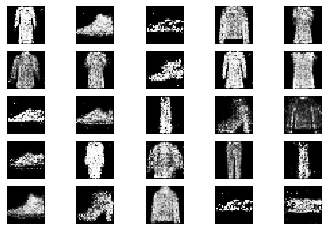

1701 [D loss: 0.589449, acc.: 57.50%] [G loss: 1.339075]
1702 [D loss: 0.511187, acc.: 77.50%] [G loss: 1.079729]
1703 [D loss: 0.457586, acc.: 82.50%] [G loss: 1.325613]
1704 [D loss: 0.682398, acc.: 60.00%] [G loss: 1.335702]
1705 [D loss: 0.678523, acc.: 62.50%] [G loss: 1.352900]
1706 [D loss: 0.684108, acc.: 67.50%] [G loss: 1.351048]
1707 [D loss: 0.554000, acc.: 75.00%] [G loss: 1.360535]
1708 [D loss: 0.638206, acc.: 70.00%] [G loss: 1.113743]
1709 [D loss: 0.711094, acc.: 57.50%] [G loss: 0.973516]
1710 [D loss: 0.502848, acc.: 75.00%] [G loss: 1.248739]
1711 [D loss: 0.613022, acc.: 57.50%] [G loss: 1.141957]
1712 [D loss: 0.506652, acc.: 77.50%] [G loss: 1.141383]
1713 [D loss: 0.642228, acc.: 67.50%] [G loss: 1.286621]
1714 [D loss: 0.603733, acc.: 65.00%] [G loss: 1.093895]
1715 [D loss: 0.648435, acc.: 60.00%] [G loss: 0.967345]
1716 [D loss: 0.543549, acc.: 77.50%] [G loss: 1.171296]
1717 [D loss: 0.702266, acc.: 57.50%] [G loss: 1.131590]
1718 [D loss: 0.606493, acc.: 7

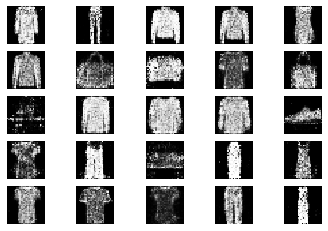

1751 [D loss: 0.598511, acc.: 70.00%] [G loss: 1.062297]
1752 [D loss: 0.610166, acc.: 70.00%] [G loss: 1.172313]
1753 [D loss: 0.660299, acc.: 62.50%] [G loss: 1.019827]
1754 [D loss: 0.597115, acc.: 65.00%] [G loss: 1.067303]
1755 [D loss: 0.683232, acc.: 62.50%] [G loss: 1.110512]
1756 [D loss: 0.650980, acc.: 60.00%] [G loss: 1.137102]
1757 [D loss: 0.520978, acc.: 75.00%] [G loss: 1.499452]
1758 [D loss: 0.717999, acc.: 62.50%] [G loss: 1.240490]
1759 [D loss: 0.767797, acc.: 50.00%] [G loss: 1.240669]
1760 [D loss: 0.542197, acc.: 60.00%] [G loss: 1.207058]
1761 [D loss: 0.704082, acc.: 57.50%] [G loss: 1.198289]
1762 [D loss: 0.588249, acc.: 70.00%] [G loss: 1.012060]
1763 [D loss: 0.636785, acc.: 65.00%] [G loss: 1.184309]
1764 [D loss: 0.542630, acc.: 72.50%] [G loss: 0.955680]
1765 [D loss: 0.546847, acc.: 80.00%] [G loss: 1.068843]
1766 [D loss: 0.702326, acc.: 57.50%] [G loss: 1.153324]
1767 [D loss: 0.625174, acc.: 65.00%] [G loss: 1.140641]
1768 [D loss: 0.515335, acc.: 8

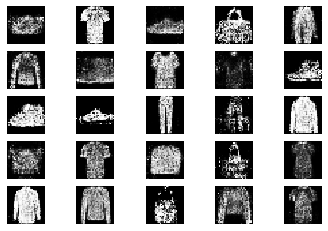

1801 [D loss: 0.616922, acc.: 65.00%] [G loss: 0.929172]
1802 [D loss: 0.511024, acc.: 70.00%] [G loss: 1.053660]
1803 [D loss: 0.573821, acc.: 65.00%] [G loss: 1.150042]
1804 [D loss: 0.667529, acc.: 57.50%] [G loss: 1.279297]
1805 [D loss: 0.657080, acc.: 62.50%] [G loss: 1.188544]
1806 [D loss: 0.517889, acc.: 72.50%] [G loss: 1.258917]
1807 [D loss: 0.542385, acc.: 70.00%] [G loss: 1.201969]
1808 [D loss: 0.502318, acc.: 80.00%] [G loss: 1.399269]
1809 [D loss: 0.519552, acc.: 72.50%] [G loss: 1.179593]
1810 [D loss: 0.537304, acc.: 72.50%] [G loss: 1.374717]
1811 [D loss: 0.487587, acc.: 80.00%] [G loss: 1.289701]
1812 [D loss: 0.703302, acc.: 55.00%] [G loss: 1.261001]
1813 [D loss: 0.474762, acc.: 82.50%] [G loss: 1.216578]
1814 [D loss: 0.543241, acc.: 80.00%] [G loss: 1.366550]
1815 [D loss: 0.530167, acc.: 77.50%] [G loss: 1.026914]
1816 [D loss: 0.584969, acc.: 67.50%] [G loss: 1.017925]
1817 [D loss: 0.519472, acc.: 65.00%] [G loss: 1.146447]
1818 [D loss: 0.532146, acc.: 7

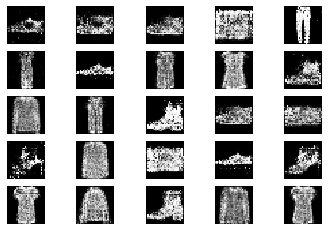

1851 [D loss: 0.627872, acc.: 62.50%] [G loss: 1.207651]
1852 [D loss: 0.702095, acc.: 55.00%] [G loss: 0.982612]
1853 [D loss: 0.546820, acc.: 67.50%] [G loss: 1.177972]
1854 [D loss: 0.565100, acc.: 75.00%] [G loss: 0.995682]
1855 [D loss: 0.674819, acc.: 60.00%] [G loss: 1.090599]
1856 [D loss: 0.563924, acc.: 72.50%] [G loss: 1.156112]
1857 [D loss: 0.445951, acc.: 77.50%] [G loss: 1.162250]
1858 [D loss: 0.506436, acc.: 75.00%] [G loss: 1.069433]
1859 [D loss: 0.586303, acc.: 72.50%] [G loss: 0.962268]
1860 [D loss: 0.552285, acc.: 70.00%] [G loss: 1.061835]
1861 [D loss: 0.644368, acc.: 62.50%] [G loss: 1.295524]
1862 [D loss: 0.516675, acc.: 70.00%] [G loss: 1.121799]
1863 [D loss: 0.513716, acc.: 72.50%] [G loss: 1.256279]
1864 [D loss: 0.585708, acc.: 70.00%] [G loss: 1.285434]
1865 [D loss: 0.684502, acc.: 60.00%] [G loss: 1.184227]
1866 [D loss: 0.619976, acc.: 70.00%] [G loss: 1.247985]
1867 [D loss: 0.523141, acc.: 77.50%] [G loss: 1.058395]
1868 [D loss: 0.489587, acc.: 7

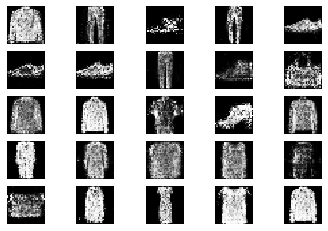

1901 [D loss: 0.530630, acc.: 72.50%] [G loss: 1.264686]
1902 [D loss: 0.544968, acc.: 80.00%] [G loss: 1.215477]
1903 [D loss: 0.542770, acc.: 75.00%] [G loss: 1.359815]
1904 [D loss: 0.569049, acc.: 65.00%] [G loss: 1.205486]
1905 [D loss: 0.636326, acc.: 65.00%] [G loss: 1.116710]
1906 [D loss: 0.522488, acc.: 75.00%] [G loss: 1.046175]
1907 [D loss: 0.612230, acc.: 65.00%] [G loss: 1.082913]
1908 [D loss: 0.686507, acc.: 65.00%] [G loss: 1.470720]
1909 [D loss: 0.578169, acc.: 72.50%] [G loss: 1.187934]
1910 [D loss: 0.561041, acc.: 67.50%] [G loss: 1.123100]
1911 [D loss: 0.572198, acc.: 65.00%] [G loss: 1.295929]
1912 [D loss: 0.596280, acc.: 67.50%] [G loss: 1.239636]
1913 [D loss: 0.528228, acc.: 75.00%] [G loss: 1.096290]
1914 [D loss: 0.632069, acc.: 60.00%] [G loss: 1.137178]
1915 [D loss: 0.657694, acc.: 65.00%] [G loss: 1.284809]
1916 [D loss: 0.511918, acc.: 75.00%] [G loss: 1.256235]
1917 [D loss: 0.511494, acc.: 80.00%] [G loss: 1.130225]
1918 [D loss: 0.658511, acc.: 6

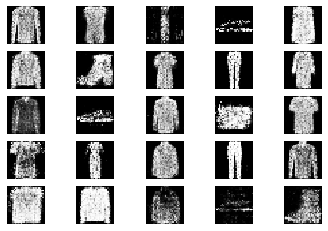

1951 [D loss: 0.583882, acc.: 57.50%] [G loss: 1.215286]
1952 [D loss: 0.636243, acc.: 62.50%] [G loss: 1.219759]
1953 [D loss: 0.595883, acc.: 65.00%] [G loss: 0.979558]
1954 [D loss: 0.695172, acc.: 62.50%] [G loss: 1.082230]
1955 [D loss: 0.627519, acc.: 67.50%] [G loss: 1.176776]
1956 [D loss: 0.670535, acc.: 60.00%] [G loss: 1.139578]
1957 [D loss: 0.564307, acc.: 75.00%] [G loss: 1.189000]
1958 [D loss: 0.606150, acc.: 67.50%] [G loss: 1.229688]
1959 [D loss: 0.701592, acc.: 65.00%] [G loss: 1.288159]
1960 [D loss: 0.559877, acc.: 72.50%] [G loss: 1.173766]
1961 [D loss: 0.567582, acc.: 77.50%] [G loss: 1.200029]
1962 [D loss: 0.728503, acc.: 57.50%] [G loss: 1.067150]
1963 [D loss: 0.672140, acc.: 57.50%] [G loss: 1.318245]
1964 [D loss: 0.450848, acc.: 80.00%] [G loss: 1.215141]
1965 [D loss: 0.665372, acc.: 65.00%] [G loss: 1.223346]
1966 [D loss: 0.691854, acc.: 65.00%] [G loss: 1.046199]
1967 [D loss: 0.692961, acc.: 65.00%] [G loss: 0.937522]
1968 [D loss: 0.543717, acc.: 7

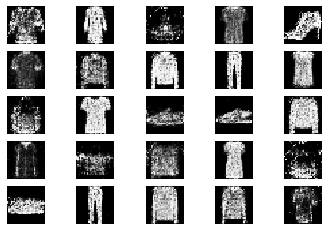

2001 [D loss: 0.689228, acc.: 55.00%] [G loss: 1.183474]
2002 [D loss: 0.636931, acc.: 62.50%] [G loss: 1.178554]
2003 [D loss: 0.588791, acc.: 70.00%] [G loss: 1.159618]
2004 [D loss: 0.546373, acc.: 75.00%] [G loss: 1.148243]
2005 [D loss: 0.640215, acc.: 67.50%] [G loss: 0.949063]
2006 [D loss: 0.698486, acc.: 55.00%] [G loss: 1.112872]
2007 [D loss: 0.471256, acc.: 82.50%] [G loss: 1.163122]
2008 [D loss: 0.493291, acc.: 82.50%] [G loss: 1.255723]
2009 [D loss: 0.519711, acc.: 77.50%] [G loss: 1.106204]
2010 [D loss: 0.610092, acc.: 62.50%] [G loss: 1.189394]
2011 [D loss: 0.540402, acc.: 70.00%] [G loss: 1.299507]
2012 [D loss: 0.543679, acc.: 75.00%] [G loss: 1.235492]
2013 [D loss: 0.572597, acc.: 70.00%] [G loss: 1.053308]
2014 [D loss: 0.682557, acc.: 65.00%] [G loss: 1.190540]
2015 [D loss: 0.717593, acc.: 55.00%] [G loss: 1.185830]
2016 [D loss: 0.668965, acc.: 65.00%] [G loss: 1.039631]
2017 [D loss: 0.518784, acc.: 72.50%] [G loss: 1.091846]
2018 [D loss: 0.529486, acc.: 8

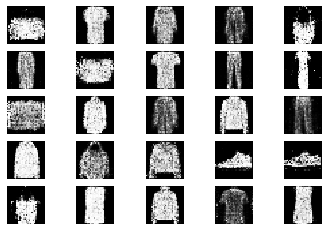

2051 [D loss: 0.607408, acc.: 70.00%] [G loss: 1.097662]
2052 [D loss: 0.641645, acc.: 60.00%] [G loss: 1.067284]
2053 [D loss: 0.625808, acc.: 62.50%] [G loss: 1.130913]
2054 [D loss: 0.476071, acc.: 77.50%] [G loss: 1.116582]
2055 [D loss: 0.640791, acc.: 57.50%] [G loss: 0.991230]
2056 [D loss: 0.616968, acc.: 70.00%] [G loss: 1.254612]
2057 [D loss: 0.521410, acc.: 77.50%] [G loss: 1.023713]
2058 [D loss: 0.547785, acc.: 72.50%] [G loss: 1.059190]
2059 [D loss: 0.711606, acc.: 60.00%] [G loss: 1.058379]
2060 [D loss: 0.605769, acc.: 55.00%] [G loss: 1.172368]
2061 [D loss: 0.575593, acc.: 75.00%] [G loss: 1.050604]
2062 [D loss: 0.664291, acc.: 62.50%] [G loss: 1.141482]
2063 [D loss: 0.548143, acc.: 72.50%] [G loss: 1.107413]
2064 [D loss: 0.624650, acc.: 52.50%] [G loss: 1.135282]
2065 [D loss: 0.620024, acc.: 67.50%] [G loss: 1.374648]
2066 [D loss: 0.650502, acc.: 50.00%] [G loss: 1.341085]
2067 [D loss: 0.600057, acc.: 62.50%] [G loss: 1.545531]
2068 [D loss: 0.573888, acc.: 6

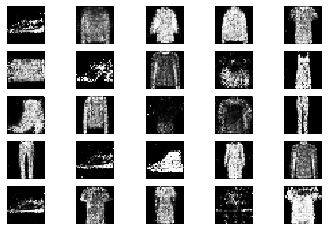

2101 [D loss: 0.603296, acc.: 75.00%] [G loss: 1.132340]
2102 [D loss: 0.497087, acc.: 80.00%] [G loss: 1.043777]
2103 [D loss: 0.595812, acc.: 57.50%] [G loss: 1.154823]
2104 [D loss: 0.599495, acc.: 57.50%] [G loss: 1.133005]
2105 [D loss: 0.513075, acc.: 72.50%] [G loss: 1.169484]
2106 [D loss: 0.505514, acc.: 70.00%] [G loss: 1.124247]
2107 [D loss: 0.500447, acc.: 75.00%] [G loss: 1.001236]
2108 [D loss: 0.519832, acc.: 72.50%] [G loss: 0.977728]
2109 [D loss: 0.560608, acc.: 67.50%] [G loss: 1.165484]
2110 [D loss: 0.524596, acc.: 77.50%] [G loss: 0.900743]
2111 [D loss: 0.639740, acc.: 70.00%] [G loss: 1.145201]
2112 [D loss: 0.570893, acc.: 72.50%] [G loss: 1.046718]
2113 [D loss: 0.712150, acc.: 52.50%] [G loss: 1.069392]
2114 [D loss: 0.545425, acc.: 72.50%] [G loss: 1.124264]
2115 [D loss: 0.519536, acc.: 80.00%] [G loss: 1.381961]
2116 [D loss: 0.547581, acc.: 75.00%] [G loss: 1.343101]
2117 [D loss: 0.639478, acc.: 57.50%] [G loss: 1.134283]
2118 [D loss: 0.470326, acc.: 7

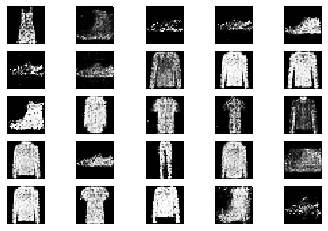

2151 [D loss: 0.534237, acc.: 82.50%] [G loss: 1.056156]
2152 [D loss: 0.601812, acc.: 82.50%] [G loss: 0.905552]
2153 [D loss: 0.539684, acc.: 77.50%] [G loss: 1.193053]
2154 [D loss: 0.475015, acc.: 87.50%] [G loss: 1.103572]
2155 [D loss: 0.652663, acc.: 65.00%] [G loss: 1.202752]
2156 [D loss: 0.525959, acc.: 72.50%] [G loss: 1.212585]
2157 [D loss: 0.668648, acc.: 67.50%] [G loss: 1.063657]
2158 [D loss: 0.644098, acc.: 65.00%] [G loss: 1.161831]
2159 [D loss: 0.594199, acc.: 62.50%] [G loss: 1.228422]
2160 [D loss: 0.539889, acc.: 77.50%] [G loss: 1.175401]
2161 [D loss: 0.695213, acc.: 52.50%] [G loss: 1.250362]
2162 [D loss: 0.668314, acc.: 62.50%] [G loss: 1.122485]
2163 [D loss: 0.641952, acc.: 57.50%] [G loss: 1.267922]
2164 [D loss: 0.625381, acc.: 65.00%] [G loss: 1.044562]
2165 [D loss: 0.569817, acc.: 67.50%] [G loss: 1.045012]
2166 [D loss: 0.530611, acc.: 70.00%] [G loss: 1.174930]
2167 [D loss: 0.631825, acc.: 72.50%] [G loss: 1.506331]
2168 [D loss: 0.512833, acc.: 7

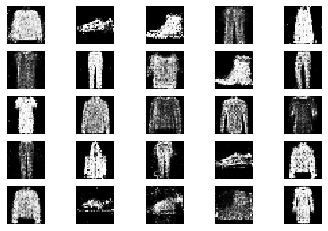

2201 [D loss: 0.543541, acc.: 77.50%] [G loss: 1.277982]
2202 [D loss: 0.576484, acc.: 65.00%] [G loss: 1.166000]
2203 [D loss: 0.592929, acc.: 65.00%] [G loss: 1.116596]
2204 [D loss: 0.668974, acc.: 65.00%] [G loss: 0.909000]
2205 [D loss: 0.593346, acc.: 65.00%] [G loss: 0.963190]
2206 [D loss: 0.606904, acc.: 70.00%] [G loss: 1.026814]
2207 [D loss: 0.547446, acc.: 67.50%] [G loss: 1.068876]
2208 [D loss: 0.567697, acc.: 70.00%] [G loss: 1.216754]
2209 [D loss: 0.636277, acc.: 65.00%] [G loss: 1.175196]
2210 [D loss: 0.515468, acc.: 77.50%] [G loss: 0.937635]
2211 [D loss: 0.506038, acc.: 77.50%] [G loss: 1.187669]
2212 [D loss: 0.580193, acc.: 70.00%] [G loss: 1.315164]
2213 [D loss: 0.597511, acc.: 60.00%] [G loss: 1.128392]
2214 [D loss: 0.625034, acc.: 62.50%] [G loss: 1.321772]
2215 [D loss: 0.619544, acc.: 62.50%] [G loss: 1.100536]
2216 [D loss: 0.647347, acc.: 65.00%] [G loss: 1.084243]
2217 [D loss: 0.610440, acc.: 65.00%] [G loss: 1.231140]
2218 [D loss: 0.648099, acc.: 6

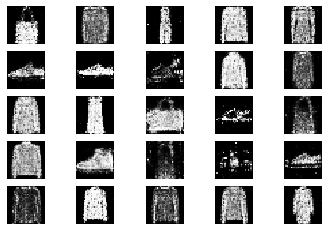

2251 [D loss: 0.676877, acc.: 62.50%] [G loss: 1.121516]
2252 [D loss: 0.632536, acc.: 65.00%] [G loss: 1.108698]
2253 [D loss: 0.788648, acc.: 60.00%] [G loss: 1.087606]
2254 [D loss: 0.604121, acc.: 65.00%] [G loss: 1.113776]
2255 [D loss: 0.615099, acc.: 70.00%] [G loss: 1.104359]
2256 [D loss: 0.605487, acc.: 65.00%] [G loss: 1.301310]
2257 [D loss: 0.547075, acc.: 72.50%] [G loss: 1.113949]
2258 [D loss: 0.544406, acc.: 70.00%] [G loss: 1.175859]
2259 [D loss: 0.581076, acc.: 67.50%] [G loss: 1.083143]
2260 [D loss: 0.552579, acc.: 65.00%] [G loss: 1.296018]
2261 [D loss: 0.558834, acc.: 57.50%] [G loss: 1.185109]
2262 [D loss: 0.535897, acc.: 70.00%] [G loss: 1.049603]
2263 [D loss: 0.589089, acc.: 82.50%] [G loss: 1.199573]
2264 [D loss: 0.468531, acc.: 77.50%] [G loss: 1.082779]
2265 [D loss: 0.768300, acc.: 52.50%] [G loss: 1.178342]
2266 [D loss: 0.630156, acc.: 67.50%] [G loss: 1.178588]
2267 [D loss: 0.660451, acc.: 65.00%] [G loss: 1.203576]
2268 [D loss: 0.615725, acc.: 6

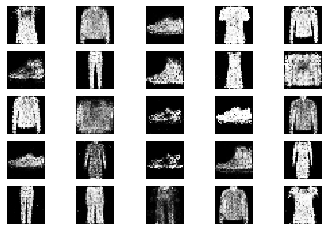

2301 [D loss: 0.618463, acc.: 62.50%] [G loss: 1.047999]
2302 [D loss: 0.699628, acc.: 62.50%] [G loss: 0.869813]
2303 [D loss: 0.731899, acc.: 50.00%] [G loss: 0.999726]
2304 [D loss: 0.493731, acc.: 82.50%] [G loss: 1.091661]
2305 [D loss: 0.714357, acc.: 60.00%] [G loss: 1.106783]
2306 [D loss: 0.669952, acc.: 65.00%] [G loss: 1.154831]
2307 [D loss: 0.558027, acc.: 67.50%] [G loss: 1.230489]
2308 [D loss: 0.592611, acc.: 62.50%] [G loss: 1.176723]
2309 [D loss: 0.607241, acc.: 70.00%] [G loss: 1.222033]
2310 [D loss: 0.534227, acc.: 72.50%] [G loss: 1.420768]
2311 [D loss: 0.616035, acc.: 70.00%] [G loss: 1.283906]
2312 [D loss: 0.479738, acc.: 80.00%] [G loss: 1.061566]
2313 [D loss: 0.492702, acc.: 80.00%] [G loss: 1.120901]
2314 [D loss: 0.557472, acc.: 72.50%] [G loss: 1.001849]
2315 [D loss: 0.527836, acc.: 77.50%] [G loss: 0.818842]
2316 [D loss: 0.645437, acc.: 62.50%] [G loss: 1.073892]
2317 [D loss: 0.552280, acc.: 72.50%] [G loss: 1.024322]
2318 [D loss: 0.593812, acc.: 7

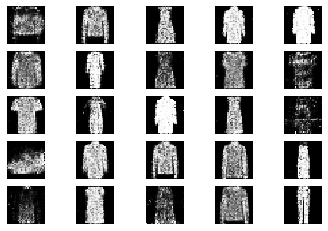

2351 [D loss: 0.510584, acc.: 75.00%] [G loss: 1.183731]
2352 [D loss: 0.663328, acc.: 62.50%] [G loss: 1.221255]
2353 [D loss: 0.556699, acc.: 70.00%] [G loss: 1.178848]
2354 [D loss: 0.575134, acc.: 70.00%] [G loss: 1.063282]
2355 [D loss: 0.565483, acc.: 67.50%] [G loss: 1.051868]
2356 [D loss: 0.603441, acc.: 67.50%] [G loss: 1.187597]
2357 [D loss: 0.657548, acc.: 55.00%] [G loss: 1.246140]
2358 [D loss: 0.564616, acc.: 70.00%] [G loss: 1.327484]
2359 [D loss: 0.581747, acc.: 65.00%] [G loss: 1.293980]
2360 [D loss: 0.585374, acc.: 65.00%] [G loss: 1.333059]
2361 [D loss: 0.482235, acc.: 75.00%] [G loss: 0.970279]
2362 [D loss: 0.562461, acc.: 72.50%] [G loss: 1.079659]
2363 [D loss: 0.566519, acc.: 72.50%] [G loss: 1.184473]
2364 [D loss: 0.662593, acc.: 60.00%] [G loss: 1.215710]
2365 [D loss: 0.642255, acc.: 57.50%] [G loss: 1.033414]
2366 [D loss: 0.798762, acc.: 55.00%] [G loss: 0.985899]
2367 [D loss: 0.550149, acc.: 77.50%] [G loss: 1.088429]
2368 [D loss: 0.527810, acc.: 7

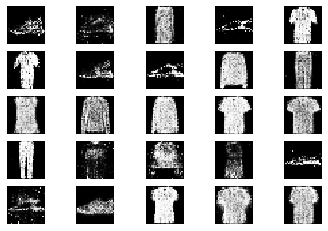

2401 [D loss: 0.552016, acc.: 67.50%] [G loss: 1.230530]
2402 [D loss: 0.589201, acc.: 67.50%] [G loss: 1.051886]
2403 [D loss: 0.573497, acc.: 72.50%] [G loss: 1.318805]
2404 [D loss: 0.582780, acc.: 67.50%] [G loss: 1.142600]
2405 [D loss: 0.585378, acc.: 72.50%] [G loss: 1.289478]
2406 [D loss: 0.635523, acc.: 62.50%] [G loss: 1.290138]
2407 [D loss: 0.644717, acc.: 62.50%] [G loss: 1.129474]
2408 [D loss: 0.560955, acc.: 75.00%] [G loss: 1.261428]
2409 [D loss: 0.646786, acc.: 62.50%] [G loss: 1.234998]
2410 [D loss: 0.540392, acc.: 72.50%] [G loss: 1.331754]
2411 [D loss: 0.497458, acc.: 80.00%] [G loss: 1.266125]
2412 [D loss: 0.651066, acc.: 62.50%] [G loss: 1.167998]
2413 [D loss: 0.658135, acc.: 65.00%] [G loss: 1.247288]
2414 [D loss: 0.562506, acc.: 67.50%] [G loss: 1.273754]
2415 [D loss: 0.682324, acc.: 60.00%] [G loss: 0.992252]
2416 [D loss: 0.537234, acc.: 75.00%] [G loss: 1.219969]
2417 [D loss: 0.637461, acc.: 60.00%] [G loss: 1.148637]
2418 [D loss: 0.558692, acc.: 7

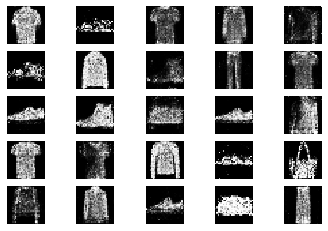

2451 [D loss: 0.622690, acc.: 72.50%] [G loss: 1.144519]
2452 [D loss: 0.584566, acc.: 75.00%] [G loss: 1.188433]
2453 [D loss: 0.598058, acc.: 57.50%] [G loss: 1.263029]
2454 [D loss: 0.612989, acc.: 62.50%] [G loss: 1.141758]
2455 [D loss: 0.603473, acc.: 72.50%] [G loss: 1.245993]
2456 [D loss: 0.564984, acc.: 77.50%] [G loss: 1.194963]
2457 [D loss: 0.582021, acc.: 67.50%] [G loss: 1.325571]
2458 [D loss: 0.549744, acc.: 72.50%] [G loss: 0.967855]
2459 [D loss: 0.538101, acc.: 70.00%] [G loss: 1.274002]
2460 [D loss: 0.573653, acc.: 67.50%] [G loss: 1.271627]
2461 [D loss: 0.464321, acc.: 80.00%] [G loss: 1.285655]
2462 [D loss: 0.636822, acc.: 62.50%] [G loss: 1.154506]
2463 [D loss: 0.573275, acc.: 70.00%] [G loss: 1.165026]
2464 [D loss: 0.519027, acc.: 72.50%] [G loss: 1.098206]
2465 [D loss: 0.632164, acc.: 65.00%] [G loss: 1.129578]
2466 [D loss: 0.621752, acc.: 62.50%] [G loss: 1.318149]
2467 [D loss: 0.481592, acc.: 82.50%] [G loss: 1.119035]
2468 [D loss: 0.515519, acc.: 8

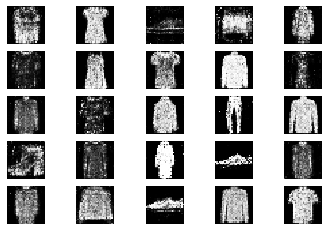

2501 [D loss: 0.585833, acc.: 60.00%] [G loss: 1.088341]
2502 [D loss: 0.566075, acc.: 75.00%] [G loss: 1.131392]
2503 [D loss: 0.541591, acc.: 72.50%] [G loss: 1.099533]
2504 [D loss: 0.620382, acc.: 57.50%] [G loss: 1.119048]
2505 [D loss: 0.610163, acc.: 65.00%] [G loss: 1.158634]
2506 [D loss: 0.570171, acc.: 67.50%] [G loss: 1.116261]
2507 [D loss: 0.610174, acc.: 70.00%] [G loss: 1.038130]
2508 [D loss: 0.587873, acc.: 62.50%] [G loss: 1.168545]
2509 [D loss: 0.592413, acc.: 60.00%] [G loss: 0.931895]
2510 [D loss: 0.682827, acc.: 57.50%] [G loss: 1.125042]
2511 [D loss: 0.601162, acc.: 72.50%] [G loss: 1.119708]
2512 [D loss: 0.447419, acc.: 80.00%] [G loss: 0.904440]
2513 [D loss: 0.562814, acc.: 75.00%] [G loss: 0.931589]
2514 [D loss: 0.499332, acc.: 72.50%] [G loss: 1.319633]
2515 [D loss: 0.487710, acc.: 72.50%] [G loss: 1.088699]
2516 [D loss: 0.587628, acc.: 65.00%] [G loss: 1.172730]
2517 [D loss: 0.611714, acc.: 62.50%] [G loss: 1.187733]
2518 [D loss: 0.537060, acc.: 7

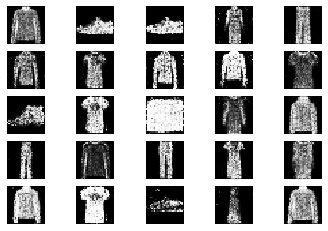

2551 [D loss: 0.586793, acc.: 70.00%] [G loss: 1.377249]
2552 [D loss: 0.710425, acc.: 50.00%] [G loss: 1.374516]
2553 [D loss: 0.639920, acc.: 60.00%] [G loss: 1.136509]
2554 [D loss: 0.540535, acc.: 70.00%] [G loss: 1.331031]
2555 [D loss: 0.570855, acc.: 70.00%] [G loss: 1.131350]
2556 [D loss: 0.503955, acc.: 75.00%] [G loss: 1.399763]
2557 [D loss: 0.714814, acc.: 57.50%] [G loss: 1.282241]
2558 [D loss: 0.521229, acc.: 80.00%] [G loss: 1.320027]
2559 [D loss: 0.661446, acc.: 57.50%] [G loss: 1.175236]
2560 [D loss: 0.594238, acc.: 70.00%] [G loss: 1.172567]
2561 [D loss: 0.604564, acc.: 65.00%] [G loss: 1.043557]
2562 [D loss: 0.603384, acc.: 70.00%] [G loss: 1.147813]
2563 [D loss: 0.511649, acc.: 75.00%] [G loss: 1.175404]
2564 [D loss: 0.562840, acc.: 75.00%] [G loss: 1.108049]
2565 [D loss: 0.612544, acc.: 60.00%] [G loss: 1.037820]
2566 [D loss: 0.742184, acc.: 57.50%] [G loss: 0.947902]
2567 [D loss: 0.610778, acc.: 70.00%] [G loss: 1.278794]
2568 [D loss: 0.468525, acc.: 8

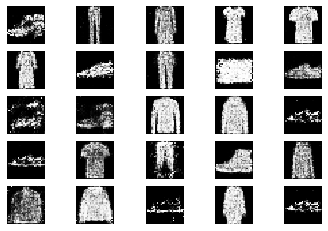

2601 [D loss: 0.498660, acc.: 77.50%] [G loss: 1.282899]
2602 [D loss: 0.494308, acc.: 80.00%] [G loss: 1.042655]
2603 [D loss: 0.672508, acc.: 62.50%] [G loss: 1.042237]
2604 [D loss: 0.566030, acc.: 65.00%] [G loss: 0.989216]
2605 [D loss: 0.752697, acc.: 55.00%] [G loss: 1.227308]
2606 [D loss: 0.576939, acc.: 70.00%] [G loss: 1.018785]
2607 [D loss: 0.530796, acc.: 72.50%] [G loss: 1.176679]
2608 [D loss: 0.825360, acc.: 47.50%] [G loss: 1.264620]
2609 [D loss: 0.630829, acc.: 67.50%] [G loss: 1.148133]
2610 [D loss: 0.681397, acc.: 52.50%] [G loss: 1.296447]
2611 [D loss: 0.506189, acc.: 77.50%] [G loss: 1.373192]
2612 [D loss: 0.654357, acc.: 57.50%] [G loss: 1.194396]
2613 [D loss: 0.541233, acc.: 72.50%] [G loss: 0.993887]
2614 [D loss: 0.622393, acc.: 70.00%] [G loss: 1.292302]
2615 [D loss: 0.661890, acc.: 55.00%] [G loss: 1.301058]
2616 [D loss: 0.473093, acc.: 77.50%] [G loss: 1.139563]
2617 [D loss: 0.676970, acc.: 62.50%] [G loss: 1.101114]
2618 [D loss: 0.597684, acc.: 6

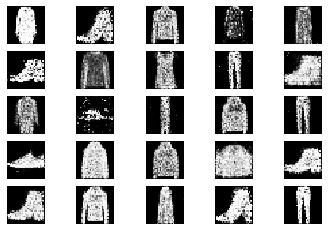

2651 [D loss: 0.611231, acc.: 60.00%] [G loss: 1.117864]
2652 [D loss: 0.559858, acc.: 70.00%] [G loss: 1.254504]
2653 [D loss: 0.544176, acc.: 65.00%] [G loss: 1.086322]
2654 [D loss: 0.505581, acc.: 80.00%] [G loss: 1.023597]
2655 [D loss: 0.713969, acc.: 60.00%] [G loss: 1.156246]
2656 [D loss: 0.436927, acc.: 82.50%] [G loss: 1.202190]
2657 [D loss: 0.626833, acc.: 60.00%] [G loss: 1.276996]
2658 [D loss: 0.572613, acc.: 65.00%] [G loss: 1.302027]
2659 [D loss: 0.496617, acc.: 80.00%] [G loss: 1.319078]
2660 [D loss: 0.650648, acc.: 62.50%] [G loss: 1.392930]
2661 [D loss: 0.666240, acc.: 62.50%] [G loss: 1.161325]
2662 [D loss: 0.537025, acc.: 75.00%] [G loss: 1.042573]
2663 [D loss: 0.681375, acc.: 57.50%] [G loss: 1.065220]
2664 [D loss: 0.536911, acc.: 72.50%] [G loss: 1.173023]
2665 [D loss: 0.581431, acc.: 70.00%] [G loss: 1.059167]
2666 [D loss: 0.583813, acc.: 70.00%] [G loss: 1.147841]
2667 [D loss: 0.678027, acc.: 57.50%] [G loss: 1.039238]
2668 [D loss: 0.543595, acc.: 7

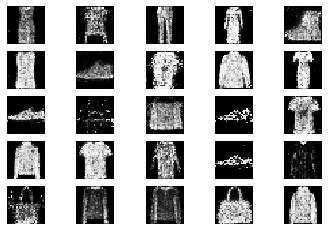

2701 [D loss: 0.500664, acc.: 85.00%] [G loss: 1.073401]
2702 [D loss: 0.599741, acc.: 70.00%] [G loss: 1.110413]
2703 [D loss: 0.509299, acc.: 80.00%] [G loss: 1.107845]
2704 [D loss: 0.608789, acc.: 60.00%] [G loss: 1.159836]
2705 [D loss: 0.682580, acc.: 55.00%] [G loss: 1.053069]
2706 [D loss: 0.560981, acc.: 70.00%] [G loss: 1.266180]
2707 [D loss: 0.533537, acc.: 75.00%] [G loss: 1.248031]
2708 [D loss: 0.684765, acc.: 60.00%] [G loss: 1.211590]
2709 [D loss: 0.551263, acc.: 72.50%] [G loss: 1.369476]
2710 [D loss: 0.512728, acc.: 72.50%] [G loss: 1.272772]
2711 [D loss: 0.647057, acc.: 60.00%] [G loss: 1.237167]
2712 [D loss: 0.564705, acc.: 67.50%] [G loss: 1.110125]
2713 [D loss: 0.612967, acc.: 67.50%] [G loss: 1.213719]
2714 [D loss: 0.585563, acc.: 80.00%] [G loss: 1.262758]
2715 [D loss: 0.587013, acc.: 70.00%] [G loss: 1.080389]
2716 [D loss: 0.641653, acc.: 65.00%] [G loss: 1.157512]
2717 [D loss: 0.616807, acc.: 62.50%] [G loss: 1.014208]
2718 [D loss: 0.611514, acc.: 7

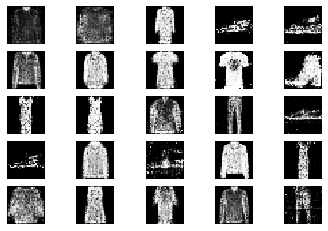

2751 [D loss: 0.523743, acc.: 77.50%] [G loss: 1.263862]
2752 [D loss: 0.728833, acc.: 57.50%] [G loss: 1.128380]
2753 [D loss: 0.566062, acc.: 72.50%] [G loss: 1.396530]
2754 [D loss: 0.598597, acc.: 65.00%] [G loss: 1.216101]
2755 [D loss: 0.545683, acc.: 75.00%] [G loss: 1.159809]
2756 [D loss: 0.503145, acc.: 80.00%] [G loss: 1.298516]
2757 [D loss: 0.648561, acc.: 65.00%] [G loss: 1.140768]
2758 [D loss: 0.645554, acc.: 55.00%] [G loss: 1.000998]
2759 [D loss: 0.588457, acc.: 67.50%] [G loss: 1.038767]
2760 [D loss: 0.667445, acc.: 62.50%] [G loss: 1.219186]
2761 [D loss: 0.523022, acc.: 72.50%] [G loss: 1.295465]
2762 [D loss: 0.571476, acc.: 65.00%] [G loss: 1.408521]
2763 [D loss: 0.517497, acc.: 80.00%] [G loss: 1.236731]
2764 [D loss: 0.466158, acc.: 75.00%] [G loss: 1.165385]
2765 [D loss: 0.923869, acc.: 50.00%] [G loss: 1.124708]
2766 [D loss: 0.672762, acc.: 60.00%] [G loss: 1.006628]
2767 [D loss: 0.659981, acc.: 57.50%] [G loss: 1.137245]
2768 [D loss: 0.502728, acc.: 7

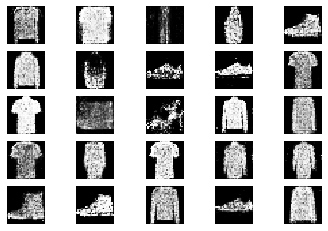

2801 [D loss: 0.361943, acc.: 87.50%] [G loss: 1.235575]
2802 [D loss: 0.563845, acc.: 67.50%] [G loss: 1.286952]
2803 [D loss: 0.553326, acc.: 70.00%] [G loss: 1.246434]
2804 [D loss: 0.491080, acc.: 80.00%] [G loss: 1.261081]
2805 [D loss: 0.602897, acc.: 70.00%] [G loss: 1.146154]
2806 [D loss: 0.729874, acc.: 57.50%] [G loss: 1.266026]
2807 [D loss: 0.593243, acc.: 60.00%] [G loss: 1.372124]
2808 [D loss: 0.482814, acc.: 75.00%] [G loss: 1.380432]
2809 [D loss: 0.689300, acc.: 57.50%] [G loss: 1.096451]
2810 [D loss: 0.471371, acc.: 80.00%] [G loss: 1.252732]
2811 [D loss: 0.616462, acc.: 60.00%] [G loss: 1.069908]
2812 [D loss: 0.605193, acc.: 62.50%] [G loss: 1.214966]
2813 [D loss: 0.597945, acc.: 75.00%] [G loss: 1.251125]
2814 [D loss: 0.503965, acc.: 77.50%] [G loss: 1.256929]
2815 [D loss: 0.535377, acc.: 72.50%] [G loss: 1.126666]
2816 [D loss: 0.554878, acc.: 70.00%] [G loss: 1.206578]
2817 [D loss: 0.540124, acc.: 72.50%] [G loss: 1.203238]
2818 [D loss: 0.467119, acc.: 8

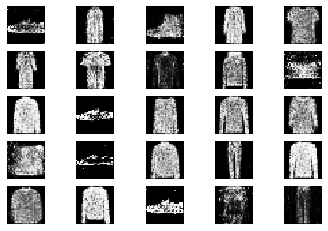

2851 [D loss: 0.691471, acc.: 57.50%] [G loss: 1.080637]
2852 [D loss: 0.488194, acc.: 82.50%] [G loss: 1.140162]
2853 [D loss: 0.493844, acc.: 80.00%] [G loss: 1.223102]
2854 [D loss: 0.577270, acc.: 70.00%] [G loss: 1.282556]
2855 [D loss: 0.520462, acc.: 72.50%] [G loss: 1.097768]
2856 [D loss: 0.633844, acc.: 60.00%] [G loss: 1.164584]
2857 [D loss: 0.504726, acc.: 72.50%] [G loss: 1.232257]
2858 [D loss: 0.650869, acc.: 60.00%] [G loss: 1.205609]
2859 [D loss: 0.610303, acc.: 70.00%] [G loss: 1.141127]
2860 [D loss: 0.542906, acc.: 75.00%] [G loss: 1.008809]
2861 [D loss: 0.672370, acc.: 60.00%] [G loss: 0.949158]
2862 [D loss: 0.551155, acc.: 75.00%] [G loss: 1.097655]
2863 [D loss: 0.532031, acc.: 82.50%] [G loss: 1.058469]
2864 [D loss: 0.527304, acc.: 77.50%] [G loss: 1.261434]
2865 [D loss: 0.469035, acc.: 82.50%] [G loss: 1.182476]
2866 [D loss: 0.516368, acc.: 80.00%] [G loss: 1.127908]
2867 [D loss: 0.558525, acc.: 75.00%] [G loss: 1.385023]
2868 [D loss: 0.600190, acc.: 8

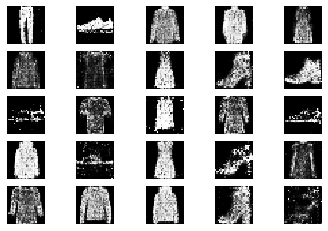

2901 [D loss: 0.646691, acc.: 65.00%] [G loss: 1.019102]
2902 [D loss: 0.626394, acc.: 65.00%] [G loss: 1.063091]
2903 [D loss: 0.690601, acc.: 52.50%] [G loss: 1.307216]
2904 [D loss: 0.527419, acc.: 72.50%] [G loss: 1.315802]
2905 [D loss: 0.678308, acc.: 52.50%] [G loss: 1.130107]
2906 [D loss: 0.631890, acc.: 57.50%] [G loss: 1.182208]
2907 [D loss: 0.636552, acc.: 62.50%] [G loss: 1.166888]
2908 [D loss: 0.589505, acc.: 70.00%] [G loss: 1.127171]
2909 [D loss: 0.602336, acc.: 62.50%] [G loss: 1.188651]
2910 [D loss: 0.559550, acc.: 65.00%] [G loss: 1.208577]
2911 [D loss: 0.549444, acc.: 60.00%] [G loss: 1.104223]
2912 [D loss: 0.609782, acc.: 70.00%] [G loss: 1.222427]
2913 [D loss: 0.734784, acc.: 52.50%] [G loss: 1.110659]
2914 [D loss: 0.614192, acc.: 72.50%] [G loss: 0.977213]
2915 [D loss: 0.618757, acc.: 67.50%] [G loss: 0.980750]
2916 [D loss: 0.534288, acc.: 77.50%] [G loss: 1.020968]
2917 [D loss: 0.625652, acc.: 62.50%] [G loss: 1.125132]
2918 [D loss: 0.619141, acc.: 6

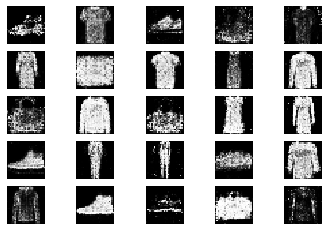

2951 [D loss: 0.491302, acc.: 80.00%] [G loss: 1.224743]
2952 [D loss: 0.534403, acc.: 65.00%] [G loss: 1.360669]
2953 [D loss: 0.676407, acc.: 62.50%] [G loss: 1.174536]
2954 [D loss: 0.602570, acc.: 75.00%] [G loss: 1.440436]
2955 [D loss: 0.575341, acc.: 67.50%] [G loss: 1.048236]
2956 [D loss: 0.545897, acc.: 75.00%] [G loss: 1.233157]
2957 [D loss: 0.655847, acc.: 60.00%] [G loss: 1.218158]
2958 [D loss: 0.548855, acc.: 75.00%] [G loss: 1.162642]
2959 [D loss: 0.500421, acc.: 70.00%] [G loss: 1.251092]
2960 [D loss: 0.688709, acc.: 60.00%] [G loss: 0.996697]
2961 [D loss: 0.682988, acc.: 60.00%] [G loss: 1.146106]
2962 [D loss: 0.585012, acc.: 72.50%] [G loss: 1.082216]
2963 [D loss: 0.573563, acc.: 70.00%] [G loss: 1.216501]
2964 [D loss: 0.466934, acc.: 80.00%] [G loss: 1.184999]
2965 [D loss: 0.673086, acc.: 62.50%] [G loss: 1.126954]
2966 [D loss: 0.567845, acc.: 70.00%] [G loss: 0.976634]
2967 [D loss: 0.562223, acc.: 65.00%] [G loss: 1.041604]
2968 [D loss: 0.432869, acc.: 8

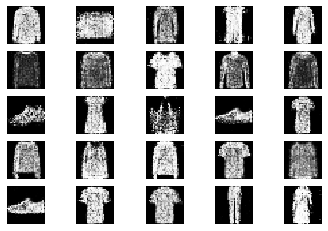

3001 [D loss: 0.616727, acc.: 70.00%] [G loss: 1.309005]
3002 [D loss: 0.665220, acc.: 57.50%] [G loss: 1.281322]
3003 [D loss: 0.628931, acc.: 67.50%] [G loss: 1.161575]
3004 [D loss: 0.603140, acc.: 60.00%] [G loss: 1.113718]
3005 [D loss: 0.587386, acc.: 65.00%] [G loss: 1.164144]
3006 [D loss: 0.692072, acc.: 47.50%] [G loss: 1.423448]
3007 [D loss: 0.628242, acc.: 65.00%] [G loss: 1.290054]
3008 [D loss: 0.567221, acc.: 67.50%] [G loss: 1.154208]
3009 [D loss: 0.551749, acc.: 67.50%] [G loss: 1.204532]
3010 [D loss: 0.547778, acc.: 72.50%] [G loss: 1.086227]
3011 [D loss: 0.587842, acc.: 70.00%] [G loss: 1.189870]
3012 [D loss: 0.458894, acc.: 77.50%] [G loss: 1.159135]
3013 [D loss: 0.680292, acc.: 62.50%] [G loss: 1.459248]
3014 [D loss: 0.553596, acc.: 70.00%] [G loss: 1.175745]
3015 [D loss: 0.573022, acc.: 65.00%] [G loss: 1.105431]
3016 [D loss: 0.650426, acc.: 62.50%] [G loss: 1.092695]
3017 [D loss: 0.656159, acc.: 57.50%] [G loss: 1.149440]
3018 [D loss: 0.529743, acc.: 7

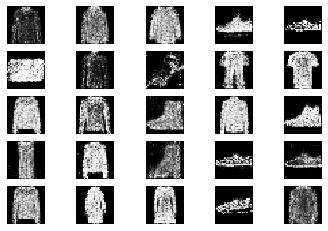

3051 [D loss: 0.587184, acc.: 62.50%] [G loss: 1.302701]
3052 [D loss: 0.534189, acc.: 77.50%] [G loss: 1.374810]
3053 [D loss: 0.505287, acc.: 80.00%] [G loss: 1.249923]
3054 [D loss: 0.527493, acc.: 70.00%] [G loss: 1.334748]
3055 [D loss: 0.547115, acc.: 77.50%] [G loss: 1.101382]
3056 [D loss: 0.537690, acc.: 67.50%] [G loss: 1.099268]
3057 [D loss: 0.505163, acc.: 75.00%] [G loss: 1.202276]
3058 [D loss: 0.601194, acc.: 70.00%] [G loss: 0.907486]
3059 [D loss: 0.506825, acc.: 80.00%] [G loss: 1.087491]
3060 [D loss: 0.566535, acc.: 67.50%] [G loss: 1.148361]
3061 [D loss: 0.572084, acc.: 72.50%] [G loss: 1.616698]
3062 [D loss: 0.572195, acc.: 65.00%] [G loss: 1.396920]
3063 [D loss: 0.567930, acc.: 67.50%] [G loss: 1.270503]
3064 [D loss: 0.576845, acc.: 77.50%] [G loss: 1.089530]
3065 [D loss: 0.608052, acc.: 67.50%] [G loss: 1.032485]
3066 [D loss: 0.673030, acc.: 67.50%] [G loss: 1.213346]
3067 [D loss: 0.546155, acc.: 75.00%] [G loss: 1.018063]
3068 [D loss: 0.571399, acc.: 6

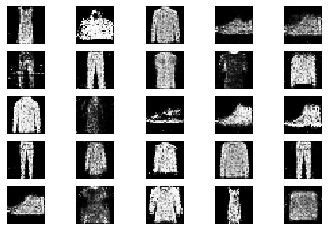

3101 [D loss: 0.647161, acc.: 62.50%] [G loss: 0.958120]
3102 [D loss: 0.553590, acc.: 70.00%] [G loss: 0.961705]
3103 [D loss: 0.585719, acc.: 72.50%] [G loss: 1.179862]
3104 [D loss: 0.552683, acc.: 72.50%] [G loss: 1.273454]
3105 [D loss: 0.795915, acc.: 52.50%] [G loss: 1.194101]
3106 [D loss: 0.461848, acc.: 80.00%] [G loss: 1.189000]
3107 [D loss: 0.644587, acc.: 75.00%] [G loss: 1.397882]
3108 [D loss: 0.743612, acc.: 60.00%] [G loss: 1.297601]
3109 [D loss: 0.644334, acc.: 67.50%] [G loss: 1.014299]
3110 [D loss: 0.680910, acc.: 65.00%] [G loss: 0.973927]
3111 [D loss: 0.598845, acc.: 67.50%] [G loss: 0.981818]
3112 [D loss: 0.536297, acc.: 70.00%] [G loss: 1.068046]
3113 [D loss: 0.551951, acc.: 67.50%] [G loss: 1.452113]
3114 [D loss: 0.655533, acc.: 67.50%] [G loss: 1.200282]
3115 [D loss: 0.558591, acc.: 72.50%] [G loss: 1.224135]
3116 [D loss: 0.542290, acc.: 75.00%] [G loss: 1.136911]
3117 [D loss: 0.570782, acc.: 65.00%] [G loss: 1.389881]
3118 [D loss: 0.562025, acc.: 6

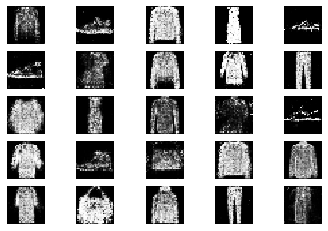

3151 [D loss: 0.602700, acc.: 67.50%] [G loss: 1.187979]
3152 [D loss: 0.476687, acc.: 85.00%] [G loss: 1.082349]
3153 [D loss: 0.469210, acc.: 87.50%] [G loss: 1.031670]
3154 [D loss: 0.631855, acc.: 62.50%] [G loss: 1.204973]
3155 [D loss: 0.573089, acc.: 70.00%] [G loss: 1.091701]
3156 [D loss: 0.552565, acc.: 77.50%] [G loss: 0.995829]
3157 [D loss: 0.528907, acc.: 75.00%] [G loss: 1.240635]
3158 [D loss: 0.522916, acc.: 67.50%] [G loss: 1.300338]
3159 [D loss: 0.548662, acc.: 70.00%] [G loss: 1.146547]
3160 [D loss: 0.505985, acc.: 70.00%] [G loss: 0.977647]
3161 [D loss: 0.509364, acc.: 72.50%] [G loss: 1.231291]
3162 [D loss: 0.674933, acc.: 65.00%] [G loss: 1.195100]
3163 [D loss: 0.471901, acc.: 70.00%] [G loss: 1.261519]
3164 [D loss: 0.500306, acc.: 80.00%] [G loss: 1.280293]
3165 [D loss: 0.582650, acc.: 67.50%] [G loss: 1.289669]
3166 [D loss: 0.485815, acc.: 82.50%] [G loss: 1.150021]
3167 [D loss: 0.632440, acc.: 72.50%] [G loss: 1.298056]
3168 [D loss: 0.612536, acc.: 6

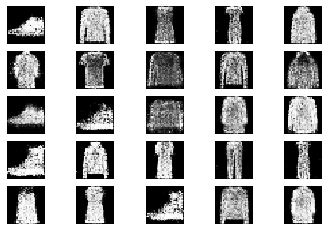

3201 [D loss: 0.488146, acc.: 77.50%] [G loss: 1.188191]
3202 [D loss: 0.629595, acc.: 62.50%] [G loss: 1.190076]
3203 [D loss: 0.584111, acc.: 62.50%] [G loss: 1.256432]
3204 [D loss: 0.561254, acc.: 70.00%] [G loss: 1.298254]
3205 [D loss: 0.523066, acc.: 65.00%] [G loss: 1.175749]
3206 [D loss: 0.610330, acc.: 70.00%] [G loss: 1.264985]
3207 [D loss: 0.538646, acc.: 82.50%] [G loss: 1.259339]
3208 [D loss: 0.587449, acc.: 77.50%] [G loss: 1.191280]
3209 [D loss: 0.593533, acc.: 67.50%] [G loss: 1.046136]
3210 [D loss: 0.548394, acc.: 70.00%] [G loss: 1.268396]
3211 [D loss: 0.557238, acc.: 75.00%] [G loss: 1.210087]
3212 [D loss: 0.637973, acc.: 62.50%] [G loss: 1.080296]
3213 [D loss: 0.522346, acc.: 77.50%] [G loss: 1.175327]
3214 [D loss: 0.435661, acc.: 87.50%] [G loss: 1.244542]
3215 [D loss: 0.634147, acc.: 57.50%] [G loss: 1.304119]
3216 [D loss: 0.565136, acc.: 72.50%] [G loss: 1.245630]
3217 [D loss: 0.569471, acc.: 67.50%] [G loss: 1.326074]
3218 [D loss: 0.544082, acc.: 7

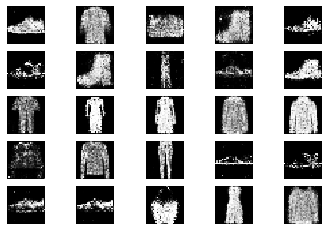

3251 [D loss: 0.805509, acc.: 50.00%] [G loss: 0.999826]
3252 [D loss: 0.631890, acc.: 60.00%] [G loss: 1.357252]
3253 [D loss: 0.534698, acc.: 77.50%] [G loss: 1.153486]
3254 [D loss: 0.644990, acc.: 57.50%] [G loss: 1.014973]
3255 [D loss: 0.536873, acc.: 75.00%] [G loss: 1.209462]
3256 [D loss: 0.622527, acc.: 60.00%] [G loss: 1.171691]
3257 [D loss: 0.568919, acc.: 57.50%] [G loss: 1.108837]
3258 [D loss: 0.682141, acc.: 50.00%] [G loss: 1.045023]
3259 [D loss: 0.610641, acc.: 75.00%] [G loss: 1.187549]
3260 [D loss: 0.642812, acc.: 62.50%] [G loss: 1.151615]
3261 [D loss: 0.602378, acc.: 70.00%] [G loss: 1.221968]
3262 [D loss: 0.508056, acc.: 82.50%] [G loss: 1.139251]
3263 [D loss: 0.492146, acc.: 75.00%] [G loss: 1.220078]
3264 [D loss: 0.706936, acc.: 62.50%] [G loss: 1.294940]
3265 [D loss: 0.715110, acc.: 60.00%] [G loss: 0.967457]
3266 [D loss: 0.623563, acc.: 67.50%] [G loss: 1.102462]
3267 [D loss: 0.642169, acc.: 55.00%] [G loss: 1.288328]
3268 [D loss: 0.537178, acc.: 7

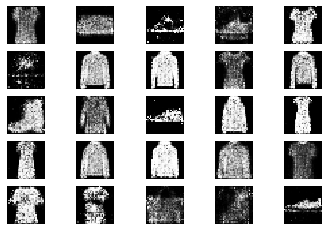

3301 [D loss: 0.583024, acc.: 62.50%] [G loss: 1.081629]
3302 [D loss: 0.628645, acc.: 62.50%] [G loss: 1.045237]
3303 [D loss: 0.663340, acc.: 60.00%] [G loss: 1.108654]
3304 [D loss: 0.510557, acc.: 75.00%] [G loss: 1.182384]
3305 [D loss: 0.578611, acc.: 65.00%] [G loss: 1.269859]
3306 [D loss: 0.529087, acc.: 72.50%] [G loss: 1.123956]
3307 [D loss: 0.528320, acc.: 72.50%] [G loss: 1.063308]
3308 [D loss: 0.671884, acc.: 62.50%] [G loss: 1.026685]
3309 [D loss: 0.674219, acc.: 62.50%] [G loss: 1.247358]
3310 [D loss: 0.512582, acc.: 77.50%] [G loss: 1.337579]
3311 [D loss: 0.590045, acc.: 72.50%] [G loss: 1.283420]
3312 [D loss: 0.602012, acc.: 62.50%] [G loss: 1.231177]
3313 [D loss: 0.721755, acc.: 57.50%] [G loss: 1.190779]
3314 [D loss: 0.548328, acc.: 72.50%] [G loss: 1.166562]
3315 [D loss: 0.503750, acc.: 77.50%] [G loss: 1.085697]
3316 [D loss: 0.660946, acc.: 60.00%] [G loss: 1.103857]
3317 [D loss: 0.703189, acc.: 60.00%] [G loss: 1.065081]
3318 [D loss: 0.638721, acc.: 6

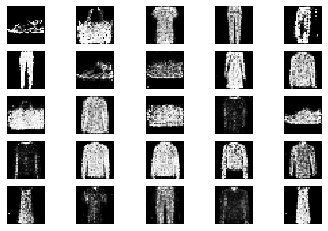

3351 [D loss: 0.688804, acc.: 62.50%] [G loss: 1.230161]
3352 [D loss: 0.724532, acc.: 57.50%] [G loss: 1.332597]
3353 [D loss: 0.644762, acc.: 62.50%] [G loss: 1.253382]
3354 [D loss: 0.815499, acc.: 50.00%] [G loss: 1.246563]
3355 [D loss: 0.752308, acc.: 65.00%] [G loss: 1.081661]
3356 [D loss: 0.538899, acc.: 77.50%] [G loss: 1.219020]
3357 [D loss: 0.596621, acc.: 67.50%] [G loss: 1.250064]
3358 [D loss: 0.647709, acc.: 60.00%] [G loss: 1.158234]
3359 [D loss: 0.680783, acc.: 62.50%] [G loss: 1.258407]
3360 [D loss: 0.799501, acc.: 27.50%] [G loss: 1.108887]
3361 [D loss: 0.673879, acc.: 60.00%] [G loss: 1.135984]
3362 [D loss: 0.698370, acc.: 57.50%] [G loss: 1.245999]
3363 [D loss: 0.551533, acc.: 70.00%] [G loss: 1.188857]
3364 [D loss: 0.718692, acc.: 52.50%] [G loss: 1.097471]
3365 [D loss: 0.538497, acc.: 70.00%] [G loss: 1.145820]
3366 [D loss: 0.473533, acc.: 82.50%] [G loss: 1.045051]
3367 [D loss: 0.552509, acc.: 72.50%] [G loss: 1.153262]
3368 [D loss: 0.585178, acc.: 6

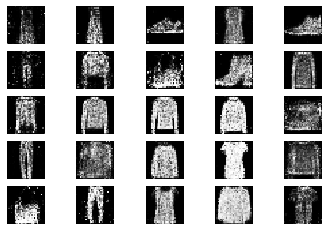

3401 [D loss: 0.567377, acc.: 70.00%] [G loss: 1.066083]
3402 [D loss: 0.588937, acc.: 65.00%] [G loss: 1.013496]
3403 [D loss: 0.456638, acc.: 85.00%] [G loss: 1.101046]
3404 [D loss: 0.467350, acc.: 82.50%] [G loss: 1.275666]
3405 [D loss: 0.543984, acc.: 80.00%] [G loss: 1.285383]
3406 [D loss: 0.664154, acc.: 65.00%] [G loss: 1.021257]
3407 [D loss: 0.572900, acc.: 67.50%] [G loss: 1.089133]
3408 [D loss: 0.630785, acc.: 62.50%] [G loss: 1.108136]
3409 [D loss: 0.526781, acc.: 72.50%] [G loss: 1.177627]
3410 [D loss: 0.624392, acc.: 57.50%] [G loss: 1.383114]
3411 [D loss: 0.554590, acc.: 72.50%] [G loss: 1.163912]
3412 [D loss: 0.652345, acc.: 55.00%] [G loss: 1.000616]
3413 [D loss: 0.610990, acc.: 72.50%] [G loss: 0.985345]
3414 [D loss: 0.493517, acc.: 82.50%] [G loss: 1.159707]
3415 [D loss: 0.619116, acc.: 62.50%] [G loss: 1.168426]
3416 [D loss: 0.664855, acc.: 52.50%] [G loss: 1.183014]
3417 [D loss: 0.568582, acc.: 72.50%] [G loss: 1.162556]
3418 [D loss: 0.472133, acc.: 7

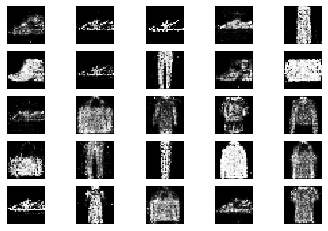

3451 [D loss: 0.626422, acc.: 65.00%] [G loss: 1.099726]
3452 [D loss: 0.649528, acc.: 65.00%] [G loss: 1.316163]
3453 [D loss: 0.533635, acc.: 62.50%] [G loss: 0.975257]
3454 [D loss: 0.571295, acc.: 72.50%] [G loss: 0.809247]
3455 [D loss: 0.653714, acc.: 60.00%] [G loss: 1.224626]
3456 [D loss: 0.560312, acc.: 75.00%] [G loss: 1.197803]
3457 [D loss: 0.620655, acc.: 67.50%] [G loss: 1.141720]
3458 [D loss: 0.607349, acc.: 65.00%] [G loss: 1.304533]
3459 [D loss: 0.643327, acc.: 67.50%] [G loss: 1.160780]
3460 [D loss: 0.577538, acc.: 72.50%] [G loss: 1.419614]
3461 [D loss: 0.652992, acc.: 67.50%] [G loss: 1.269265]
3462 [D loss: 0.532091, acc.: 77.50%] [G loss: 1.148502]
3463 [D loss: 0.639330, acc.: 60.00%] [G loss: 1.061189]
3464 [D loss: 0.504272, acc.: 77.50%] [G loss: 1.283073]
3465 [D loss: 0.531424, acc.: 77.50%] [G loss: 1.148448]
3466 [D loss: 0.530072, acc.: 70.00%] [G loss: 1.271380]
3467 [D loss: 0.609561, acc.: 67.50%] [G loss: 1.230935]
3468 [D loss: 0.592054, acc.: 6

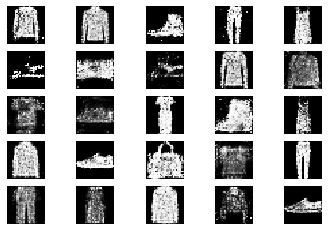

3501 [D loss: 0.478824, acc.: 80.00%] [G loss: 1.361733]
3502 [D loss: 0.641277, acc.: 60.00%] [G loss: 1.271965]
3503 [D loss: 0.570591, acc.: 67.50%] [G loss: 0.929630]
3504 [D loss: 0.428062, acc.: 80.00%] [G loss: 1.345743]
3505 [D loss: 0.619510, acc.: 65.00%] [G loss: 1.340297]
3506 [D loss: 0.608567, acc.: 60.00%] [G loss: 1.237008]
3507 [D loss: 0.540070, acc.: 70.00%] [G loss: 1.216595]
3508 [D loss: 0.573168, acc.: 62.50%] [G loss: 1.399346]
3509 [D loss: 0.481635, acc.: 77.50%] [G loss: 1.231858]
3510 [D loss: 0.695526, acc.: 62.50%] [G loss: 1.181451]
3511 [D loss: 0.565875, acc.: 70.00%] [G loss: 1.260437]
3512 [D loss: 0.567293, acc.: 70.00%] [G loss: 1.135636]
3513 [D loss: 0.640154, acc.: 57.50%] [G loss: 1.062843]
3514 [D loss: 0.532068, acc.: 75.00%] [G loss: 1.114513]
3515 [D loss: 0.480629, acc.: 77.50%] [G loss: 1.080610]
3516 [D loss: 0.861052, acc.: 47.50%] [G loss: 1.247177]
3517 [D loss: 0.519407, acc.: 75.00%] [G loss: 1.232234]
3518 [D loss: 0.620168, acc.: 6

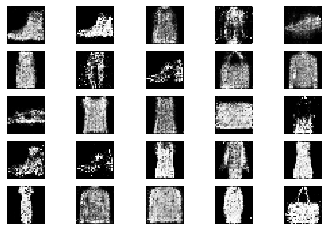

3551 [D loss: 0.509167, acc.: 70.00%] [G loss: 1.118548]
3552 [D loss: 0.578876, acc.: 70.00%] [G loss: 1.151802]
3553 [D loss: 0.551355, acc.: 72.50%] [G loss: 1.400710]
3554 [D loss: 0.766274, acc.: 45.00%] [G loss: 1.241429]
3555 [D loss: 0.605698, acc.: 75.00%] [G loss: 1.218790]
3556 [D loss: 0.598296, acc.: 72.50%] [G loss: 1.098418]
3557 [D loss: 0.563217, acc.: 75.00%] [G loss: 0.780313]
3558 [D loss: 0.511754, acc.: 70.00%] [G loss: 1.150965]
3559 [D loss: 0.541556, acc.: 72.50%] [G loss: 1.188117]
3560 [D loss: 0.513758, acc.: 87.50%] [G loss: 1.217119]
3561 [D loss: 0.659341, acc.: 60.00%] [G loss: 1.097930]
3562 [D loss: 0.645070, acc.: 60.00%] [G loss: 1.159410]
3563 [D loss: 0.557225, acc.: 67.50%] [G loss: 1.249589]
3564 [D loss: 0.545795, acc.: 67.50%] [G loss: 1.412250]
3565 [D loss: 0.521972, acc.: 72.50%] [G loss: 1.586252]
3566 [D loss: 0.568999, acc.: 65.00%] [G loss: 1.219991]
3567 [D loss: 0.575845, acc.: 70.00%] [G loss: 1.170832]
3568 [D loss: 0.511762, acc.: 7

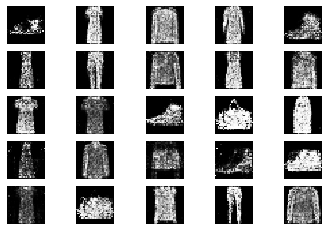

3601 [D loss: 0.600397, acc.: 67.50%] [G loss: 1.224772]
3602 [D loss: 0.599247, acc.: 65.00%] [G loss: 1.372574]
3603 [D loss: 0.562517, acc.: 67.50%] [G loss: 1.203835]
3604 [D loss: 0.489400, acc.: 75.00%] [G loss: 1.394111]
3605 [D loss: 0.680232, acc.: 67.50%] [G loss: 1.283577]
3606 [D loss: 0.501370, acc.: 75.00%] [G loss: 1.228955]
3607 [D loss: 0.713527, acc.: 52.50%] [G loss: 1.174672]
3608 [D loss: 0.616371, acc.: 70.00%] [G loss: 1.333486]
3609 [D loss: 0.559465, acc.: 65.00%] [G loss: 1.336716]
3610 [D loss: 0.632044, acc.: 60.00%] [G loss: 1.134867]
3611 [D loss: 0.683695, acc.: 62.50%] [G loss: 1.103573]
3612 [D loss: 0.526313, acc.: 72.50%] [G loss: 1.348438]
3613 [D loss: 0.635159, acc.: 65.00%] [G loss: 1.194041]
3614 [D loss: 0.597959, acc.: 57.50%] [G loss: 1.306976]
3615 [D loss: 0.521179, acc.: 72.50%] [G loss: 1.439090]
3616 [D loss: 0.611684, acc.: 67.50%] [G loss: 1.104456]
3617 [D loss: 0.526398, acc.: 65.00%] [G loss: 1.313764]
3618 [D loss: 0.750370, acc.: 6

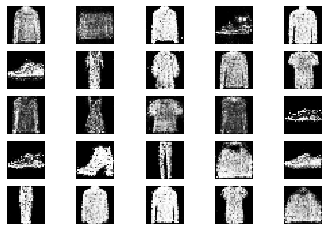

3651 [D loss: 0.660535, acc.: 60.00%] [G loss: 0.956722]
3652 [D loss: 0.580653, acc.: 67.50%] [G loss: 1.277608]
3653 [D loss: 0.558569, acc.: 67.50%] [G loss: 1.175763]
3654 [D loss: 0.642790, acc.: 65.00%] [G loss: 1.212648]
3655 [D loss: 0.702733, acc.: 60.00%] [G loss: 1.306057]
3656 [D loss: 0.510266, acc.: 77.50%] [G loss: 1.260234]
3657 [D loss: 0.516794, acc.: 72.50%] [G loss: 1.141988]
3658 [D loss: 0.612277, acc.: 67.50%] [G loss: 1.171253]
3659 [D loss: 0.611307, acc.: 65.00%] [G loss: 1.022266]
3660 [D loss: 0.551062, acc.: 70.00%] [G loss: 0.918510]
3661 [D loss: 0.442774, acc.: 82.50%] [G loss: 1.086156]
3662 [D loss: 0.504912, acc.: 82.50%] [G loss: 1.476138]
3663 [D loss: 0.546625, acc.: 72.50%] [G loss: 1.262444]
3664 [D loss: 0.716544, acc.: 60.00%] [G loss: 1.325080]
3665 [D loss: 0.473213, acc.: 77.50%] [G loss: 0.990476]
3666 [D loss: 0.529418, acc.: 72.50%] [G loss: 1.071217]
3667 [D loss: 0.617245, acc.: 65.00%] [G loss: 0.961242]
3668 [D loss: 0.565572, acc.: 7

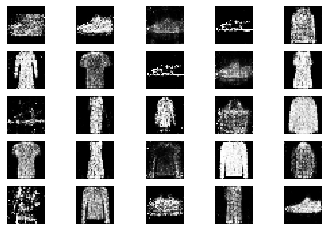

3701 [D loss: 0.600819, acc.: 60.00%] [G loss: 0.959096]
3702 [D loss: 0.457869, acc.: 82.50%] [G loss: 1.368470]
3703 [D loss: 0.523504, acc.: 72.50%] [G loss: 1.153713]
3704 [D loss: 0.642433, acc.: 65.00%] [G loss: 1.394966]
3705 [D loss: 0.586224, acc.: 65.00%] [G loss: 1.137349]
3706 [D loss: 0.638292, acc.: 52.50%] [G loss: 1.063491]
3707 [D loss: 0.520928, acc.: 77.50%] [G loss: 0.934327]
3708 [D loss: 0.609216, acc.: 65.00%] [G loss: 1.081883]
3709 [D loss: 0.628067, acc.: 55.00%] [G loss: 1.140144]
3710 [D loss: 0.596529, acc.: 60.00%] [G loss: 1.101379]
3711 [D loss: 0.525413, acc.: 70.00%] [G loss: 1.323402]
3712 [D loss: 0.605767, acc.: 72.50%] [G loss: 1.202974]
3713 [D loss: 0.456726, acc.: 85.00%] [G loss: 1.528370]
3714 [D loss: 0.520512, acc.: 77.50%] [G loss: 1.126207]
3715 [D loss: 0.604263, acc.: 67.50%] [G loss: 1.460947]
3716 [D loss: 0.553883, acc.: 70.00%] [G loss: 1.336415]
3717 [D loss: 0.583121, acc.: 62.50%] [G loss: 1.177795]
3718 [D loss: 0.581803, acc.: 6

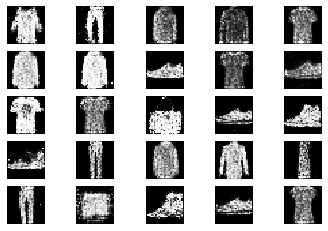

3751 [D loss: 0.617394, acc.: 67.50%] [G loss: 1.177487]
3752 [D loss: 0.626005, acc.: 67.50%] [G loss: 1.051863]
3753 [D loss: 0.643656, acc.: 52.50%] [G loss: 1.115202]
3754 [D loss: 0.650434, acc.: 60.00%] [G loss: 1.121325]
3755 [D loss: 0.589609, acc.: 70.00%] [G loss: 1.232712]
3756 [D loss: 0.557877, acc.: 77.50%] [G loss: 1.146370]
3757 [D loss: 0.589847, acc.: 67.50%] [G loss: 1.031949]
3758 [D loss: 0.639477, acc.: 75.00%] [G loss: 1.277336]
3759 [D loss: 0.633073, acc.: 52.50%] [G loss: 1.191760]
3760 [D loss: 0.699337, acc.: 52.50%] [G loss: 1.363748]
3761 [D loss: 0.610784, acc.: 67.50%] [G loss: 1.209662]
3762 [D loss: 0.470509, acc.: 85.00%] [G loss: 1.176495]
3763 [D loss: 0.567818, acc.: 70.00%] [G loss: 1.027757]
3764 [D loss: 0.541744, acc.: 72.50%] [G loss: 1.081741]
3765 [D loss: 0.663008, acc.: 62.50%] [G loss: 1.150024]
3766 [D loss: 0.549652, acc.: 72.50%] [G loss: 1.194325]
3767 [D loss: 0.569463, acc.: 77.50%] [G loss: 1.298478]
3768 [D loss: 0.468488, acc.: 8

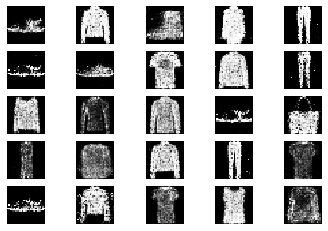

3801 [D loss: 0.613139, acc.: 67.50%] [G loss: 1.443842]
3802 [D loss: 0.647174, acc.: 67.50%] [G loss: 1.457860]
3803 [D loss: 0.504805, acc.: 77.50%] [G loss: 1.191241]
3804 [D loss: 0.511541, acc.: 75.00%] [G loss: 1.281432]
3805 [D loss: 0.506345, acc.: 80.00%] [G loss: 1.245568]
3806 [D loss: 0.607912, acc.: 72.50%] [G loss: 1.070233]
3807 [D loss: 0.631459, acc.: 60.00%] [G loss: 1.145239]
3808 [D loss: 0.641017, acc.: 60.00%] [G loss: 1.160743]
3809 [D loss: 0.588374, acc.: 65.00%] [G loss: 1.183169]
3810 [D loss: 0.621082, acc.: 67.50%] [G loss: 1.206130]
3811 [D loss: 0.559932, acc.: 80.00%] [G loss: 1.093159]
3812 [D loss: 0.706392, acc.: 55.00%] [G loss: 1.190951]
3813 [D loss: 0.558478, acc.: 75.00%] [G loss: 1.033852]
3814 [D loss: 0.601348, acc.: 62.50%] [G loss: 1.009269]
3815 [D loss: 0.583206, acc.: 70.00%] [G loss: 1.021703]
3816 [D loss: 0.541772, acc.: 70.00%] [G loss: 1.214892]
3817 [D loss: 0.527250, acc.: 70.00%] [G loss: 1.103370]
3818 [D loss: 0.681003, acc.: 6

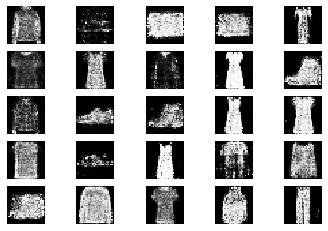

3851 [D loss: 0.627404, acc.: 60.00%] [G loss: 1.151650]
3852 [D loss: 0.575164, acc.: 75.00%] [G loss: 1.242727]
3853 [D loss: 0.591529, acc.: 70.00%] [G loss: 1.016897]
3854 [D loss: 0.566638, acc.: 65.00%] [G loss: 1.150156]
3855 [D loss: 0.582361, acc.: 67.50%] [G loss: 1.350389]
3856 [D loss: 0.534250, acc.: 77.50%] [G loss: 1.113641]
3857 [D loss: 0.461720, acc.: 80.00%] [G loss: 1.239343]
3858 [D loss: 0.574999, acc.: 67.50%] [G loss: 1.262238]
3859 [D loss: 0.660115, acc.: 57.50%] [G loss: 1.509410]
3860 [D loss: 0.405745, acc.: 87.50%] [G loss: 1.264730]
3861 [D loss: 0.688269, acc.: 57.50%] [G loss: 1.002034]
3862 [D loss: 0.499453, acc.: 75.00%] [G loss: 1.085743]
3863 [D loss: 0.574383, acc.: 70.00%] [G loss: 1.233916]
3864 [D loss: 0.534976, acc.: 70.00%] [G loss: 1.052428]
3865 [D loss: 0.716301, acc.: 55.00%] [G loss: 1.203799]
3866 [D loss: 0.714080, acc.: 57.50%] [G loss: 1.147462]
3867 [D loss: 0.480630, acc.: 80.00%] [G loss: 1.283015]
3868 [D loss: 0.557601, acc.: 7

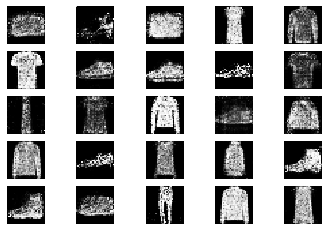

3901 [D loss: 0.609495, acc.: 67.50%] [G loss: 1.258155]
3902 [D loss: 0.693480, acc.: 50.00%] [G loss: 1.275889]
3903 [D loss: 0.553797, acc.: 70.00%] [G loss: 1.234691]
3904 [D loss: 0.705992, acc.: 70.00%] [G loss: 1.352751]
3905 [D loss: 0.757981, acc.: 57.50%] [G loss: 1.212449]
3906 [D loss: 0.548563, acc.: 77.50%] [G loss: 1.298001]
3907 [D loss: 0.647328, acc.: 65.00%] [G loss: 1.235423]
3908 [D loss: 0.599642, acc.: 67.50%] [G loss: 1.192504]
3909 [D loss: 0.539007, acc.: 67.50%] [G loss: 1.342048]
3910 [D loss: 0.570389, acc.: 72.50%] [G loss: 1.189706]
3911 [D loss: 0.587584, acc.: 65.00%] [G loss: 1.108351]
3912 [D loss: 0.604155, acc.: 67.50%] [G loss: 1.150932]
3913 [D loss: 0.413973, acc.: 80.00%] [G loss: 1.383936]
3914 [D loss: 0.574310, acc.: 62.50%] [G loss: 1.320336]
3915 [D loss: 0.541841, acc.: 75.00%] [G loss: 1.169610]
3916 [D loss: 0.690135, acc.: 57.50%] [G loss: 1.109714]
3917 [D loss: 0.511675, acc.: 77.50%] [G loss: 1.423562]
3918 [D loss: 0.652603, acc.: 6

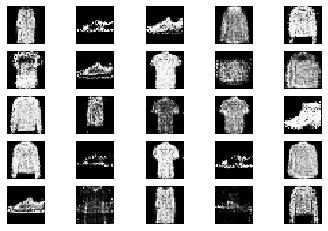

3951 [D loss: 0.582958, acc.: 60.00%] [G loss: 1.057276]
3952 [D loss: 0.567075, acc.: 70.00%] [G loss: 0.995876]
3953 [D loss: 0.597814, acc.: 60.00%] [G loss: 1.066265]
3954 [D loss: 0.628112, acc.: 57.50%] [G loss: 1.278605]
3955 [D loss: 0.588910, acc.: 67.50%] [G loss: 1.151752]
3956 [D loss: 0.597398, acc.: 70.00%] [G loss: 1.217072]
3957 [D loss: 0.729018, acc.: 67.50%] [G loss: 0.987368]
3958 [D loss: 0.554207, acc.: 70.00%] [G loss: 1.301426]
3959 [D loss: 0.606820, acc.: 65.00%] [G loss: 1.020460]
3960 [D loss: 0.573450, acc.: 72.50%] [G loss: 1.120662]
3961 [D loss: 0.431467, acc.: 87.50%] [G loss: 1.312482]
3962 [D loss: 0.791235, acc.: 50.00%] [G loss: 1.248382]
3963 [D loss: 0.586423, acc.: 65.00%] [G loss: 1.344052]
3964 [D loss: 0.539254, acc.: 70.00%] [G loss: 1.118081]
3965 [D loss: 0.663110, acc.: 62.50%] [G loss: 1.191989]
3966 [D loss: 0.617996, acc.: 65.00%] [G loss: 1.108625]
3967 [D loss: 0.720091, acc.: 50.00%] [G loss: 1.327813]
3968 [D loss: 0.583699, acc.: 6

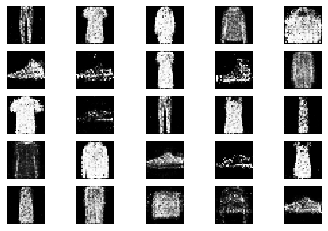

4001 [D loss: 0.567046, acc.: 70.00%] [G loss: 1.088981]
4002 [D loss: 0.644927, acc.: 65.00%] [G loss: 1.104227]
4003 [D loss: 0.584867, acc.: 67.50%] [G loss: 1.044797]
4004 [D loss: 0.577301, acc.: 72.50%] [G loss: 1.215084]
4005 [D loss: 0.602331, acc.: 75.00%] [G loss: 1.244205]
4006 [D loss: 0.631418, acc.: 57.50%] [G loss: 1.300260]
4007 [D loss: 0.644380, acc.: 70.00%] [G loss: 1.268844]
4008 [D loss: 0.494672, acc.: 82.50%] [G loss: 1.405282]
4009 [D loss: 0.712824, acc.: 62.50%] [G loss: 1.468600]
4010 [D loss: 0.520042, acc.: 77.50%] [G loss: 1.322334]
4011 [D loss: 0.731256, acc.: 57.50%] [G loss: 1.116540]
4012 [D loss: 0.634505, acc.: 62.50%] [G loss: 1.191421]
4013 [D loss: 0.735011, acc.: 50.00%] [G loss: 1.055356]
4014 [D loss: 0.679675, acc.: 55.00%] [G loss: 1.070130]
4015 [D loss: 0.611379, acc.: 65.00%] [G loss: 1.390755]
4016 [D loss: 0.497335, acc.: 77.50%] [G loss: 1.183499]
4017 [D loss: 0.534938, acc.: 77.50%] [G loss: 1.157691]
4018 [D loss: 0.631986, acc.: 6

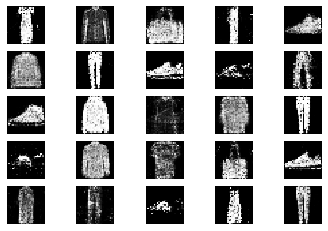

4051 [D loss: 0.526105, acc.: 75.00%] [G loss: 1.148609]
4052 [D loss: 0.695590, acc.: 55.00%] [G loss: 1.080864]
4053 [D loss: 0.630082, acc.: 65.00%] [G loss: 1.141434]
4054 [D loss: 0.621344, acc.: 62.50%] [G loss: 1.237781]
4055 [D loss: 0.528160, acc.: 75.00%] [G loss: 1.174211]
4056 [D loss: 0.690182, acc.: 62.50%] [G loss: 1.311953]
4057 [D loss: 0.625826, acc.: 67.50%] [G loss: 1.212329]
4058 [D loss: 0.588436, acc.: 67.50%] [G loss: 1.299658]
4059 [D loss: 0.586124, acc.: 62.50%] [G loss: 1.074959]
4060 [D loss: 0.536053, acc.: 75.00%] [G loss: 1.257644]
4061 [D loss: 0.625310, acc.: 70.00%] [G loss: 1.443867]
4062 [D loss: 0.533333, acc.: 70.00%] [G loss: 1.399592]
4063 [D loss: 0.649154, acc.: 52.50%] [G loss: 1.122681]
4064 [D loss: 0.664252, acc.: 65.00%] [G loss: 1.158028]
4065 [D loss: 0.613049, acc.: 52.50%] [G loss: 1.088317]
4066 [D loss: 0.601532, acc.: 67.50%] [G loss: 1.062096]
4067 [D loss: 0.542998, acc.: 70.00%] [G loss: 1.102956]
4068 [D loss: 0.721941, acc.: 5

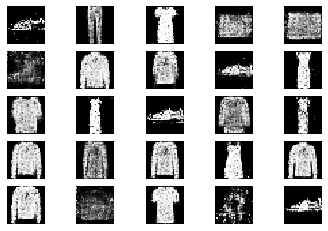

4101 [D loss: 0.527286, acc.: 77.50%] [G loss: 1.062070]
4102 [D loss: 0.533807, acc.: 75.00%] [G loss: 1.172886]
4103 [D loss: 0.392711, acc.: 92.50%] [G loss: 1.260984]
4104 [D loss: 0.593393, acc.: 75.00%] [G loss: 1.481460]
4105 [D loss: 0.424051, acc.: 80.00%] [G loss: 1.349304]
4106 [D loss: 0.572219, acc.: 75.00%] [G loss: 1.101278]
4107 [D loss: 0.612488, acc.: 75.00%] [G loss: 1.283775]
4108 [D loss: 0.533434, acc.: 77.50%] [G loss: 0.948320]
4109 [D loss: 0.644779, acc.: 57.50%] [G loss: 1.019520]
4110 [D loss: 0.533669, acc.: 72.50%] [G loss: 0.990893]
4111 [D loss: 0.494716, acc.: 75.00%] [G loss: 1.149390]
4112 [D loss: 0.558653, acc.: 72.50%] [G loss: 1.307703]
4113 [D loss: 0.479336, acc.: 77.50%] [G loss: 1.334491]
4114 [D loss: 0.561254, acc.: 67.50%] [G loss: 1.252285]
4115 [D loss: 0.600849, acc.: 67.50%] [G loss: 1.488913]
4116 [D loss: 0.495987, acc.: 75.00%] [G loss: 1.314253]
4117 [D loss: 0.485956, acc.: 75.00%] [G loss: 1.230031]
4118 [D loss: 0.455566, acc.: 8

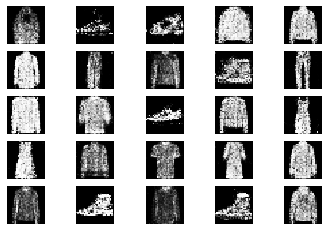

4151 [D loss: 0.555478, acc.: 75.00%] [G loss: 1.316270]
4152 [D loss: 0.464666, acc.: 80.00%] [G loss: 1.250440]
4153 [D loss: 0.545159, acc.: 75.00%] [G loss: 1.260327]
4154 [D loss: 0.560292, acc.: 65.00%] [G loss: 1.339777]
4155 [D loss: 0.553432, acc.: 70.00%] [G loss: 1.372432]
4156 [D loss: 0.619398, acc.: 72.50%] [G loss: 1.264503]
4157 [D loss: 0.639822, acc.: 70.00%] [G loss: 1.016292]
4158 [D loss: 0.609913, acc.: 67.50%] [G loss: 1.132114]
4159 [D loss: 0.505277, acc.: 70.00%] [G loss: 1.241033]
4160 [D loss: 0.624891, acc.: 65.00%] [G loss: 1.105129]
4161 [D loss: 0.561006, acc.: 70.00%] [G loss: 1.239532]
4162 [D loss: 0.608448, acc.: 72.50%] [G loss: 1.220575]
4163 [D loss: 0.714052, acc.: 55.00%] [G loss: 1.134956]
4164 [D loss: 0.740590, acc.: 60.00%] [G loss: 1.142103]
4165 [D loss: 0.464716, acc.: 80.00%] [G loss: 1.186153]
4166 [D loss: 0.638945, acc.: 50.00%] [G loss: 1.170991]
4167 [D loss: 0.502529, acc.: 77.50%] [G loss: 1.088398]
4168 [D loss: 0.577873, acc.: 8

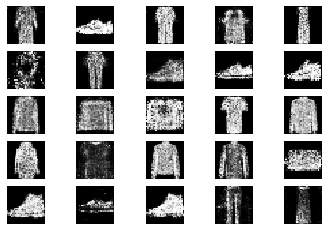

4201 [D loss: 0.595210, acc.: 67.50%] [G loss: 1.301532]
4202 [D loss: 0.635666, acc.: 62.50%] [G loss: 1.165846]
4203 [D loss: 0.706331, acc.: 60.00%] [G loss: 1.194612]
4204 [D loss: 0.657223, acc.: 65.00%] [G loss: 1.197557]
4205 [D loss: 0.630073, acc.: 75.00%] [G loss: 1.406003]
4206 [D loss: 0.634966, acc.: 67.50%] [G loss: 1.091505]
4207 [D loss: 0.620661, acc.: 60.00%] [G loss: 1.266145]
4208 [D loss: 0.585368, acc.: 72.50%] [G loss: 1.148127]
4209 [D loss: 0.577522, acc.: 77.50%] [G loss: 1.196448]
4210 [D loss: 0.542315, acc.: 72.50%] [G loss: 1.132930]
4211 [D loss: 0.574949, acc.: 75.00%] [G loss: 1.197871]
4212 [D loss: 0.702726, acc.: 67.50%] [G loss: 1.093081]
4213 [D loss: 0.535488, acc.: 67.50%] [G loss: 1.192123]
4214 [D loss: 0.588570, acc.: 80.00%] [G loss: 1.113361]
4215 [D loss: 0.565495, acc.: 72.50%] [G loss: 1.051408]
4216 [D loss: 0.548888, acc.: 65.00%] [G loss: 1.276551]
4217 [D loss: 0.574818, acc.: 67.50%] [G loss: 1.401284]
4218 [D loss: 0.498635, acc.: 7

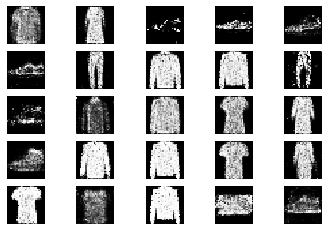

4251 [D loss: 0.625973, acc.: 62.50%] [G loss: 1.189205]
4252 [D loss: 0.616623, acc.: 70.00%] [G loss: 1.178781]
4253 [D loss: 0.632447, acc.: 70.00%] [G loss: 0.947597]
4254 [D loss: 0.478179, acc.: 75.00%] [G loss: 1.287130]
4255 [D loss: 0.709662, acc.: 55.00%] [G loss: 1.300156]
4256 [D loss: 0.669280, acc.: 62.50%] [G loss: 1.219646]
4257 [D loss: 0.549107, acc.: 70.00%] [G loss: 1.258083]
4258 [D loss: 0.591930, acc.: 70.00%] [G loss: 1.256820]
4259 [D loss: 0.519576, acc.: 85.00%] [G loss: 1.218189]
4260 [D loss: 0.471001, acc.: 72.50%] [G loss: 1.273556]
4261 [D loss: 0.830658, acc.: 52.50%] [G loss: 0.996730]
4262 [D loss: 0.564093, acc.: 70.00%] [G loss: 1.022763]
4263 [D loss: 0.669413, acc.: 55.00%] [G loss: 1.062687]
4264 [D loss: 0.537371, acc.: 70.00%] [G loss: 1.395908]
4265 [D loss: 0.550149, acc.: 72.50%] [G loss: 1.143342]
4266 [D loss: 0.504784, acc.: 70.00%] [G loss: 1.235217]
4267 [D loss: 0.591222, acc.: 67.50%] [G loss: 1.059035]
4268 [D loss: 0.591933, acc.: 6

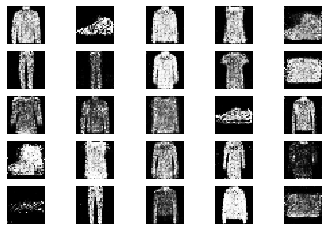

4301 [D loss: 0.562215, acc.: 80.00%] [G loss: 1.086914]
4302 [D loss: 0.444647, acc.: 87.50%] [G loss: 1.011670]
4303 [D loss: 0.568079, acc.: 75.00%] [G loss: 1.124367]
4304 [D loss: 0.583099, acc.: 70.00%] [G loss: 1.140296]
4305 [D loss: 0.591871, acc.: 72.50%] [G loss: 1.347076]
4306 [D loss: 0.513659, acc.: 80.00%] [G loss: 1.082110]
4307 [D loss: 0.597354, acc.: 70.00%] [G loss: 1.306933]
4308 [D loss: 0.698061, acc.: 55.00%] [G loss: 1.122576]
4309 [D loss: 0.621123, acc.: 67.50%] [G loss: 1.010468]
4310 [D loss: 0.495264, acc.: 75.00%] [G loss: 1.043427]
4311 [D loss: 0.602121, acc.: 75.00%] [G loss: 1.236517]
4312 [D loss: 0.661001, acc.: 57.50%] [G loss: 1.241252]
4313 [D loss: 0.558852, acc.: 72.50%] [G loss: 1.036294]
4314 [D loss: 0.662347, acc.: 60.00%] [G loss: 1.220315]
4315 [D loss: 0.642354, acc.: 62.50%] [G loss: 1.375773]
4316 [D loss: 0.606148, acc.: 65.00%] [G loss: 1.183257]
4317 [D loss: 0.528543, acc.: 75.00%] [G loss: 1.342304]
4318 [D loss: 0.604989, acc.: 6

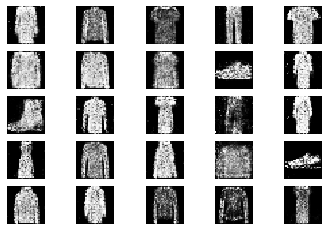

4351 [D loss: 0.488720, acc.: 80.00%] [G loss: 1.280961]
4352 [D loss: 0.546689, acc.: 72.50%] [G loss: 1.177374]
4353 [D loss: 0.455890, acc.: 82.50%] [G loss: 1.233473]
4354 [D loss: 0.644370, acc.: 67.50%] [G loss: 1.379834]
4355 [D loss: 0.670511, acc.: 70.00%] [G loss: 1.220913]
4356 [D loss: 0.655493, acc.: 62.50%] [G loss: 1.075612]
4357 [D loss: 0.531439, acc.: 75.00%] [G loss: 1.192945]
4358 [D loss: 0.570888, acc.: 75.00%] [G loss: 1.026508]
4359 [D loss: 0.593625, acc.: 67.50%] [G loss: 1.225697]
4360 [D loss: 0.492712, acc.: 82.50%] [G loss: 1.176227]
4361 [D loss: 0.571767, acc.: 70.00%] [G loss: 1.230195]
4362 [D loss: 0.447293, acc.: 87.50%] [G loss: 1.163215]
4363 [D loss: 0.427751, acc.: 82.50%] [G loss: 1.072407]
4364 [D loss: 0.651014, acc.: 72.50%] [G loss: 1.131621]
4365 [D loss: 0.531098, acc.: 77.50%] [G loss: 1.139500]
4366 [D loss: 0.584790, acc.: 70.00%] [G loss: 1.153923]
4367 [D loss: 0.427782, acc.: 80.00%] [G loss: 0.981376]
4368 [D loss: 0.707907, acc.: 5

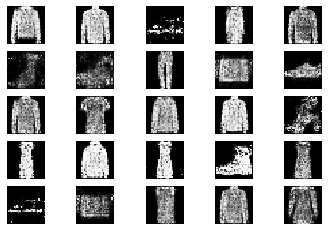

4401 [D loss: 0.605888, acc.: 70.00%] [G loss: 1.229770]
4402 [D loss: 0.476094, acc.: 85.00%] [G loss: 1.084191]
4403 [D loss: 0.673341, acc.: 60.00%] [G loss: 1.127385]
4404 [D loss: 0.532131, acc.: 75.00%] [G loss: 1.140350]
4405 [D loss: 0.602974, acc.: 70.00%] [G loss: 1.341882]
4406 [D loss: 0.537018, acc.: 77.50%] [G loss: 1.086507]
4407 [D loss: 0.527144, acc.: 72.50%] [G loss: 1.049086]
4408 [D loss: 0.577594, acc.: 72.50%] [G loss: 1.344203]
4409 [D loss: 0.579014, acc.: 70.00%] [G loss: 1.466485]
4410 [D loss: 0.494442, acc.: 80.00%] [G loss: 1.377615]
4411 [D loss: 0.621755, acc.: 65.00%] [G loss: 1.594121]
4412 [D loss: 0.609789, acc.: 65.00%] [G loss: 1.254999]
4413 [D loss: 0.568743, acc.: 65.00%] [G loss: 1.189999]
4414 [D loss: 0.488106, acc.: 80.00%] [G loss: 1.277140]
4415 [D loss: 0.580113, acc.: 70.00%] [G loss: 1.311824]
4416 [D loss: 0.663000, acc.: 57.50%] [G loss: 1.071505]
4417 [D loss: 0.621801, acc.: 67.50%] [G loss: 1.143744]
4418 [D loss: 0.591015, acc.: 6

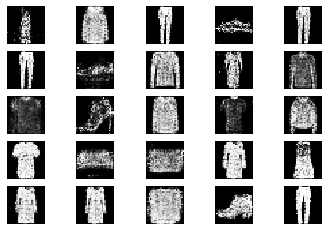

4451 [D loss: 0.540606, acc.: 70.00%] [G loss: 1.273061]
4452 [D loss: 0.503906, acc.: 77.50%] [G loss: 1.301147]
4453 [D loss: 0.582494, acc.: 65.00%] [G loss: 1.163864]
4454 [D loss: 0.673621, acc.: 52.50%] [G loss: 1.306142]
4455 [D loss: 0.592419, acc.: 65.00%] [G loss: 1.156111]
4456 [D loss: 0.649180, acc.: 75.00%] [G loss: 1.176355]
4457 [D loss: 0.591354, acc.: 60.00%] [G loss: 1.163836]
4458 [D loss: 0.665473, acc.: 55.00%] [G loss: 1.096573]
4459 [D loss: 0.645512, acc.: 57.50%] [G loss: 1.152429]
4460 [D loss: 0.551110, acc.: 72.50%] [G loss: 1.011760]
4461 [D loss: 0.591463, acc.: 70.00%] [G loss: 1.197522]
4462 [D loss: 0.648947, acc.: 62.50%] [G loss: 1.209769]
4463 [D loss: 0.650588, acc.: 57.50%] [G loss: 1.169965]
4464 [D loss: 0.529412, acc.: 80.00%] [G loss: 1.200856]
4465 [D loss: 0.559339, acc.: 70.00%] [G loss: 1.165817]
4466 [D loss: 0.541487, acc.: 82.50%] [G loss: 0.983369]
4467 [D loss: 0.664218, acc.: 57.50%] [G loss: 1.049210]
4468 [D loss: 0.636974, acc.: 5

In [24]:
epochs = 4500

batch_size = 20
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

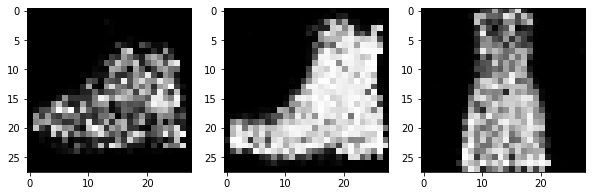

In [25]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.75*gen_imgs+0.5

plt.figure(figsize=(10, 5))
plt.subplot(131)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(132)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(133)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()